In [1]:
import torchvision.transforms.v2 as v2
from torch import optim
import torch 

from dlvc.models.cnn_opt import SimpleCNNTuneOpt, SimpleCNNOpt, DeepCNNOpt, DeepNormalizedCNNOpt
from sklearn.model_selection import ParameterGrid # install scikit-learn

from evaluation import cifar_load, train_model_opt, test_model, save_metrics, plot_metrics

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

- Add More Convolutional Layers: Deeper networks can extract more complex features. However, overfitting can be a concern.

- Change Activation Function: ReLU is commonly used, but we can experiment with others like LeakyReLU, ELU, or SELU.

- Use Batch Normalization: Batch normalization can make the network faster and more stable.

- Adjust Dropout Rate: Dropout can help prevent overfitting.

- Use Different Optimizers: We could try Adam, RMSProp, or SGD.

- Learning Rate Scheduling: Decrease the learning rate over time.

- Data Augmentation: This can help prevent overfitting and improve the model's ability to generalize.

In [3]:
# # Load CIFAR-10 dataset
# transform_opt = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# train_data_opt, val_data_opt, test_data_opt = cifar_load(transform_opt)

# # Split dataset into training and validation sets
# val_size = int(0.2 * len(train_data_opt))
# train_data_opt_, val_data_opt_ = torch.utils.data.random_split(train_data_opt, [len(train_data_opt) - val_size, val_size])

# # Define DataLoader for training and validation sets
# train_loader_opt = DataLoader(train_data_opt_, batch_size=64, shuffle=False)
# val_loader_opt = DataLoader(val_data_opt_, batch_size=64, shuffle=False)
# test_loader_opt = DataLoader(test_data_opt, batch_size=64, shuffle=False)

# # Perform grid search for hyperparameter optimization
# best_val_accuracy = 0.0
# best_hyperparameters = None
# best_model = None
# results = []

# param_grid = {
#     'conv_filters': [[3, 6, 16]],  # Number of filters for each conv layer
#     'fc_neurons': [[16 * 5 * 5, 120, 84, 10], [16 * 5 * 5, 240, 168, 10]],  # Number of neurons for each fc layer
#     'activation_func': [nn.ReLU(), nn.Sigmoid()],  
#     'dropout_rate': [0.25, 0.5],  
#     'learning_rate': [0.001, 0.01]  
# }

# for i, params in enumerate(ParameterGrid(param_grid)):
    
#     model = SimpleCNNTuneOpt(conv_filters=params['conv_filters'], fc_neurons=params['fc_neurons'], activation_func=params['activation_func'], dropout_rate=params['dropout_rate'])
#     optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

#     print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')
    
#     name = model.__class__.__name__

#     for param in params:
#         name += "_"+param + "_" + str(params[param])
    
    
#     trainer = train_model_opt(model, optimizer, name)

#     trainer.train()

#     save_metrics(trainer, name, params)

#     model, test_metric = test_model(model, params)

#     plot_metrics(trainer, name)

#     if test_metric.accuracy() > best_val_accuracy:
#         best_val_accuracy = test_metric.accuracy()
#         best_hyperparameters = params
#         best_model = model

# print("Model:", best_model.__class__.__name__)
# print("Best model found with hyperparameters:", best_hyperparameters)
# print("Best validation accuracy:", best_val_accuracy)



1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  SimpleCNNOpt

TRAIN, EPOCH: 0 
Loss: 2.121333122253418
Accuracy: 0.1522
Class Accuracy: 0.15228328704833985

VALIDATION, EPOCH: 0 
Loss: 2.1667447090148926
Accuracy: 0.2223
Class Accuracy: 0.2228614130988717
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.8918124437332153
Accuracy: 0.2286
Class Accuracy: 0.22968883402645587

VALIDATION, EPOCH: 1 
Loss: 1.7357958555221558
Accuracy: 0.286
Class Accuracy: 0.2852677697315812
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.8293625116348267
Accuracy: 0.2583
Class Accuracy: 0.25904572904109957

VALIDATION, EPOCH: 2 
Loss: 2.154097080230713
Accuracy: 0.3097
Class Accuracy: 0.3093410888686776
Best mean per class accuracy on validation data set is higher. Saving new b

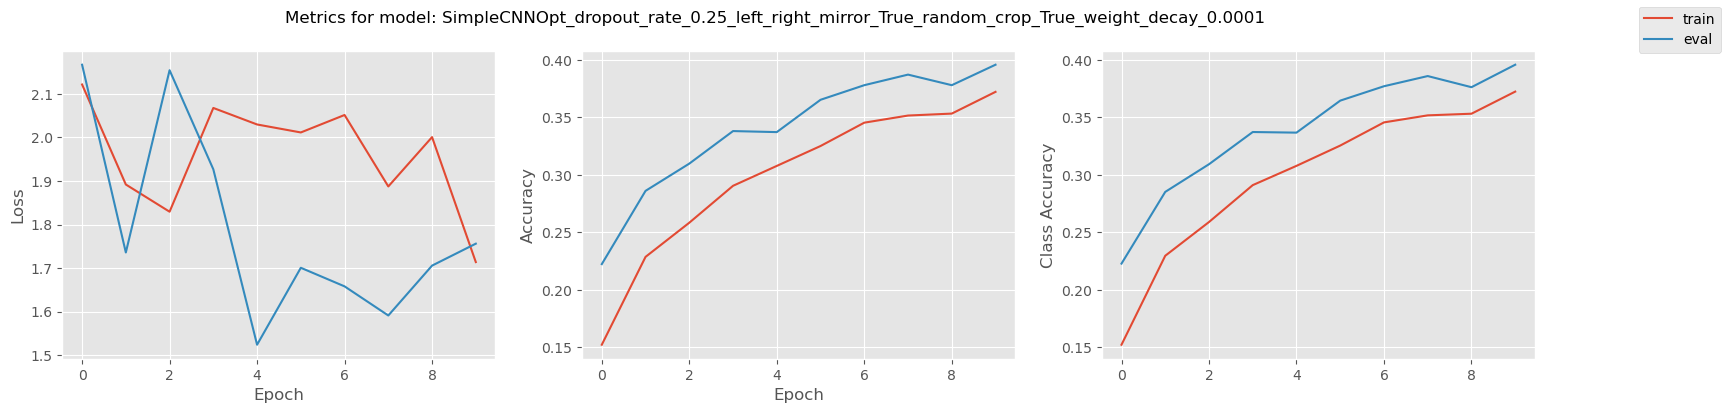

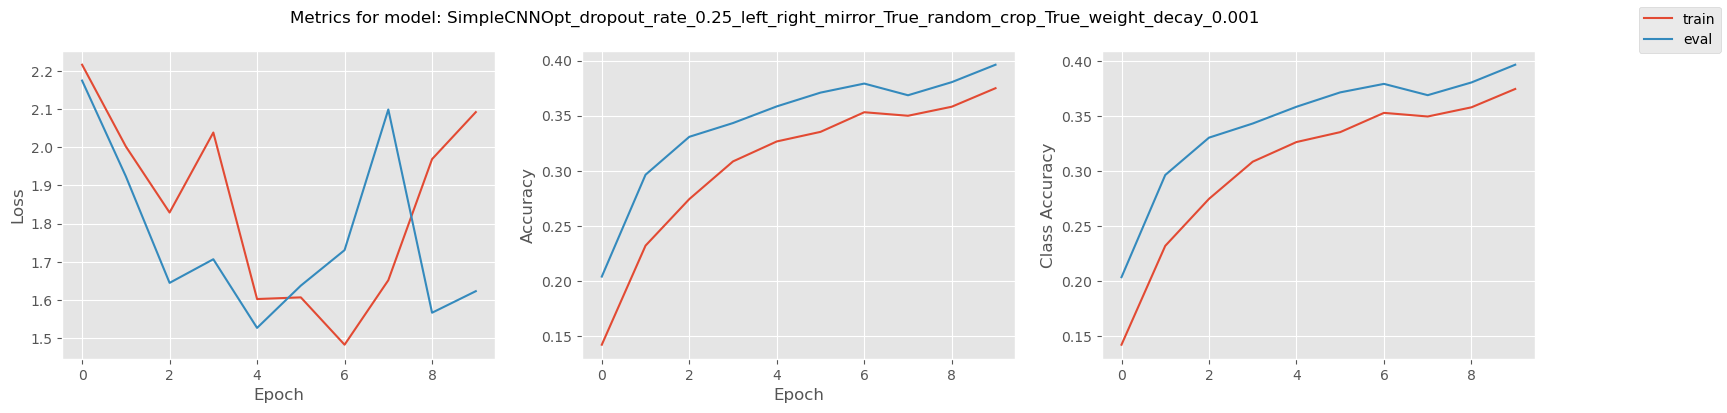

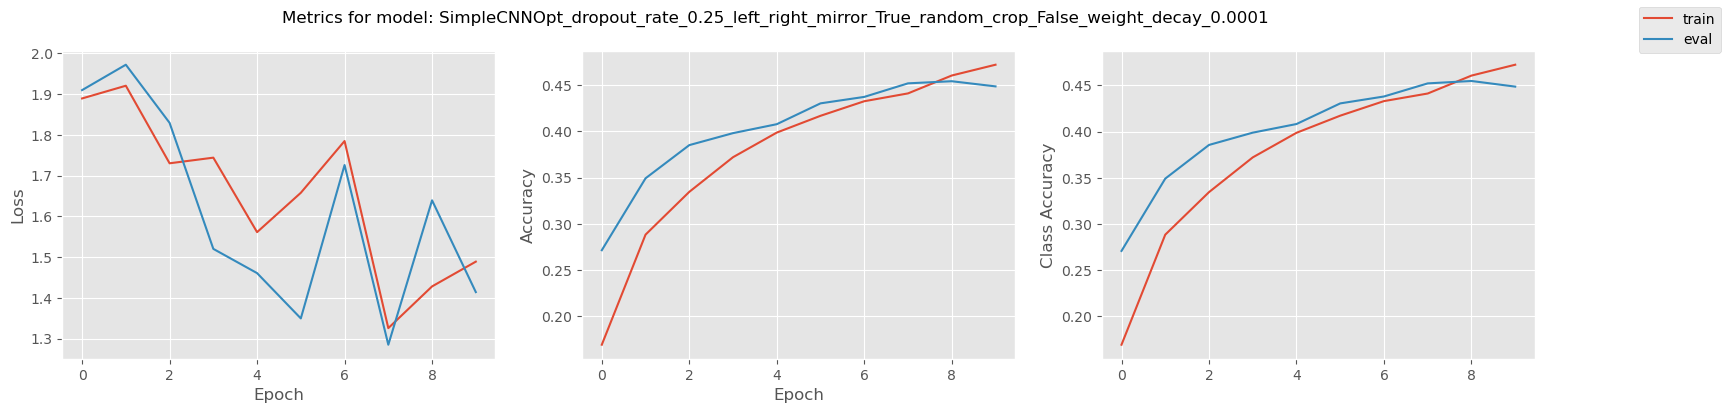

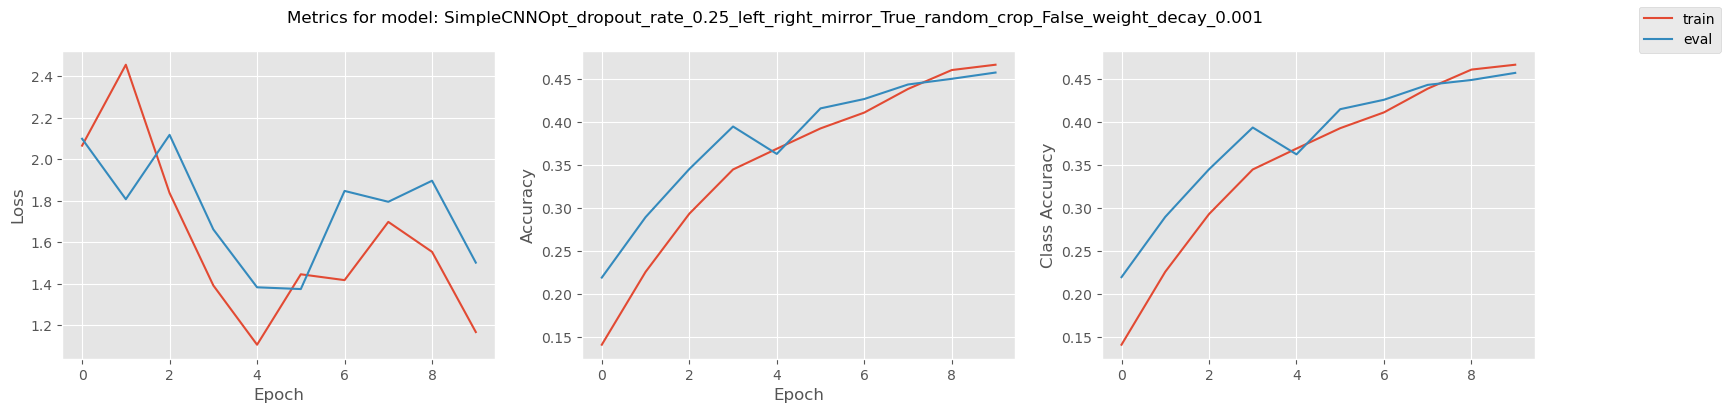

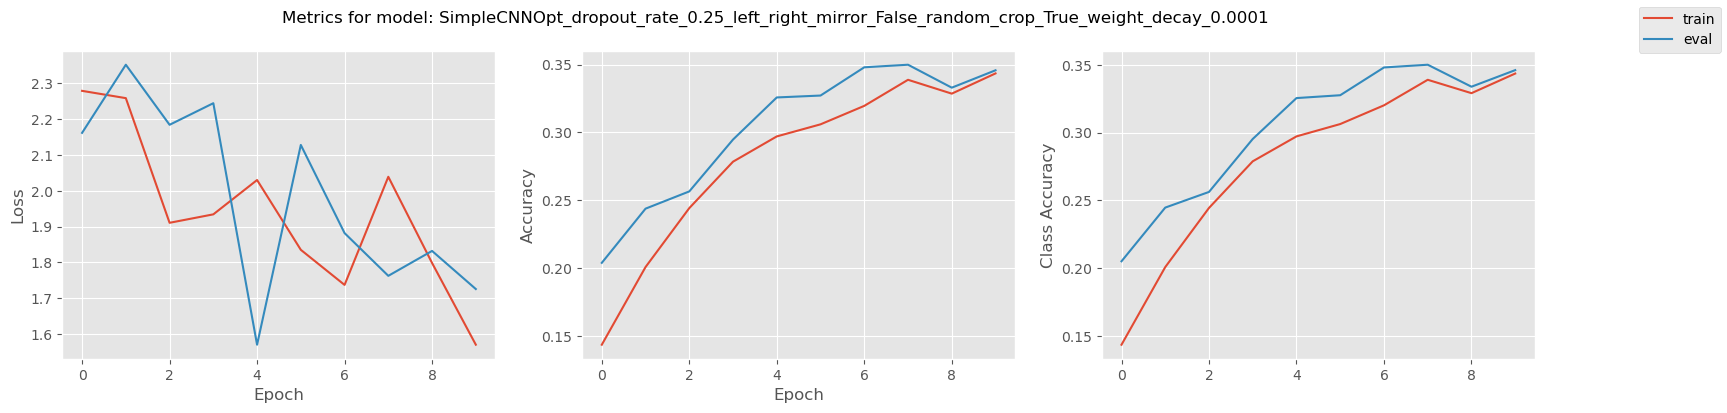

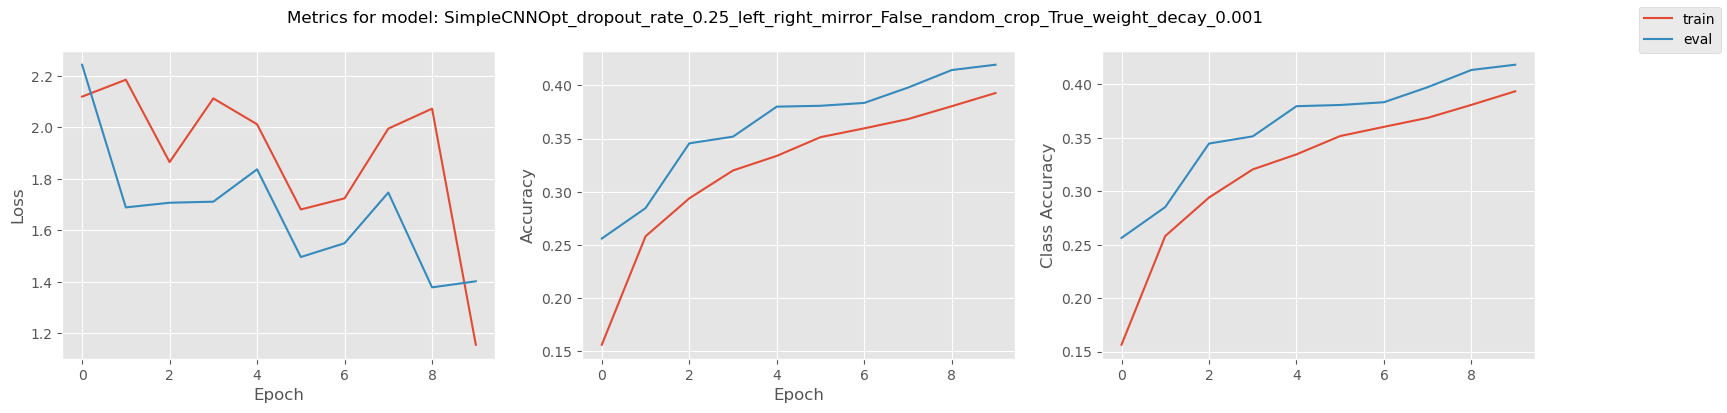

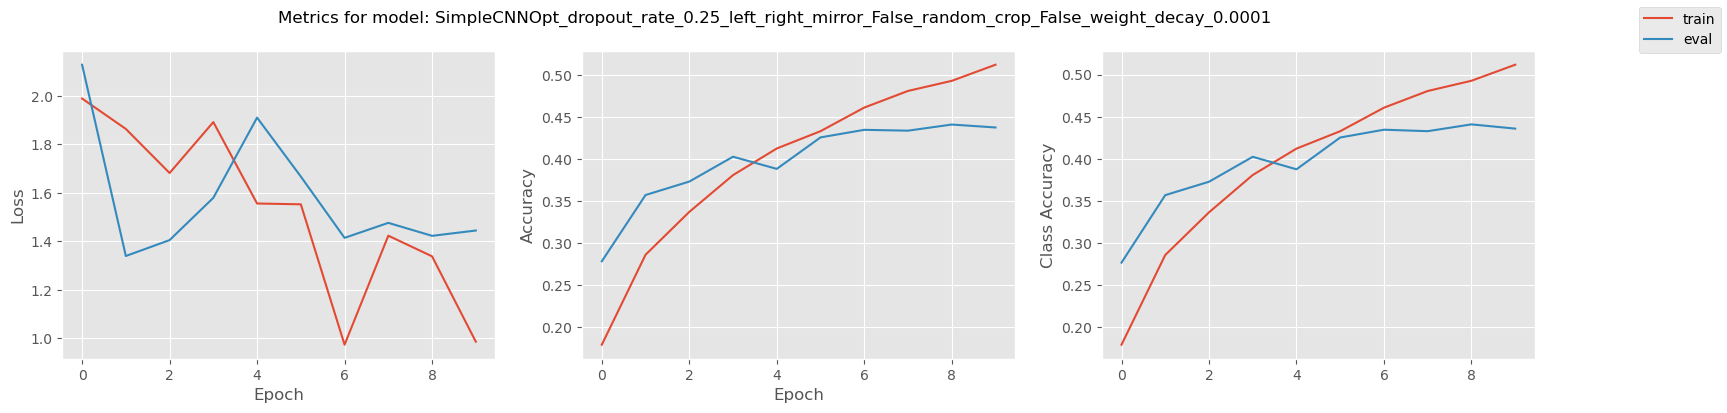

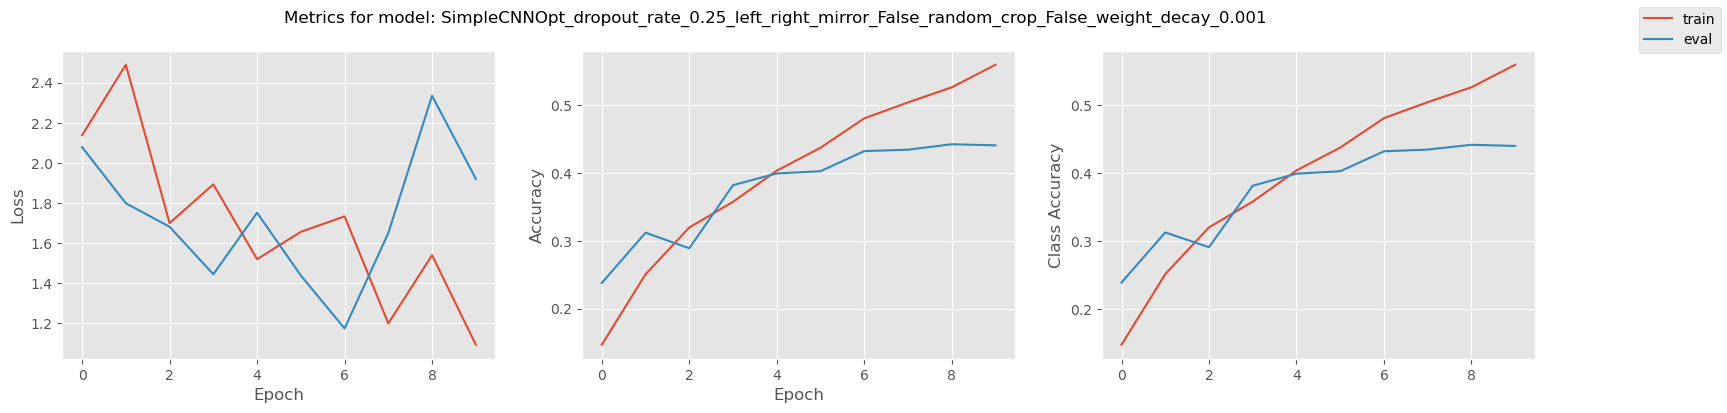

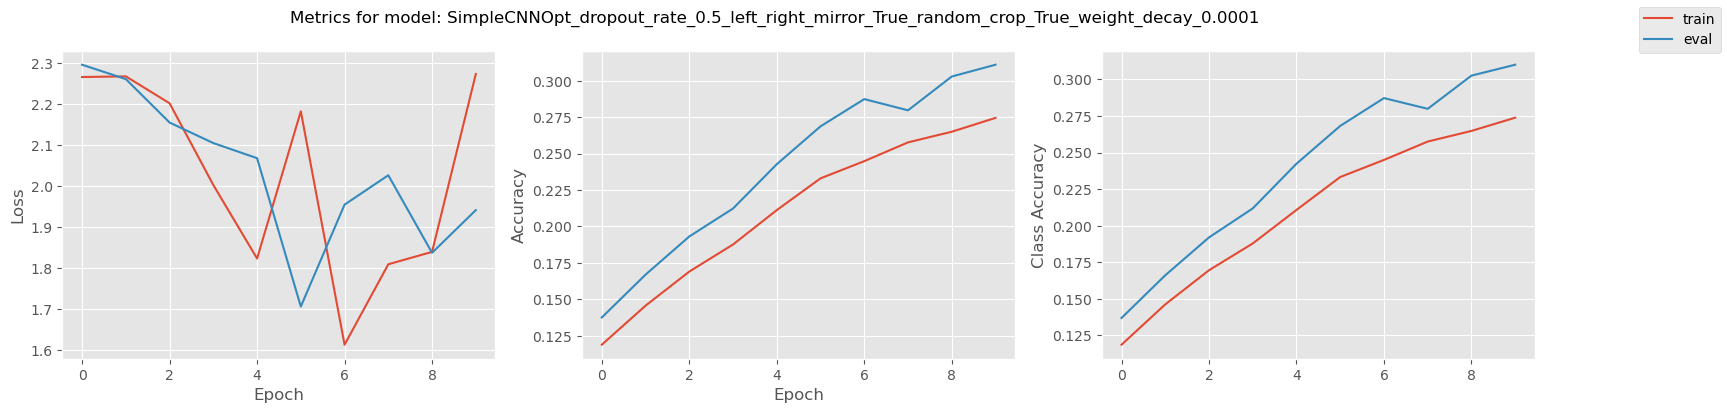

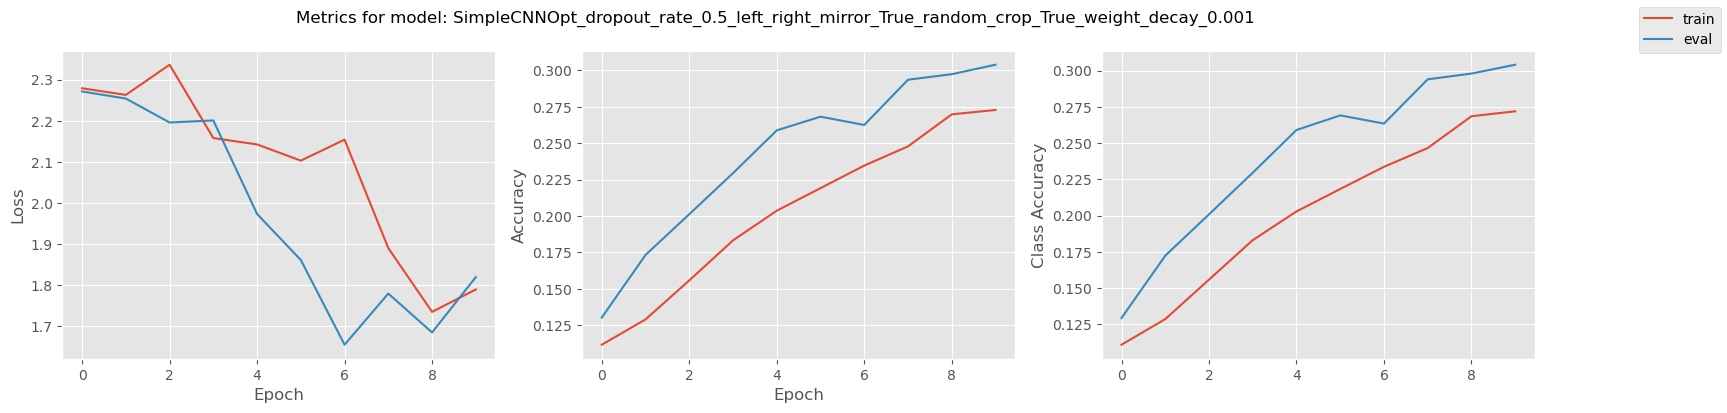

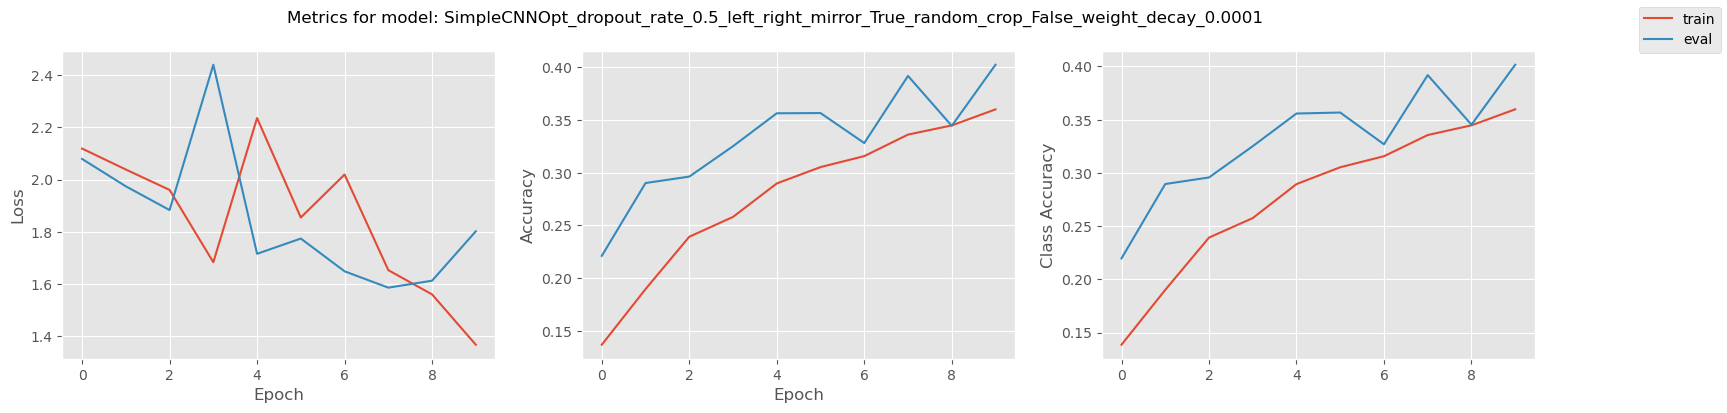

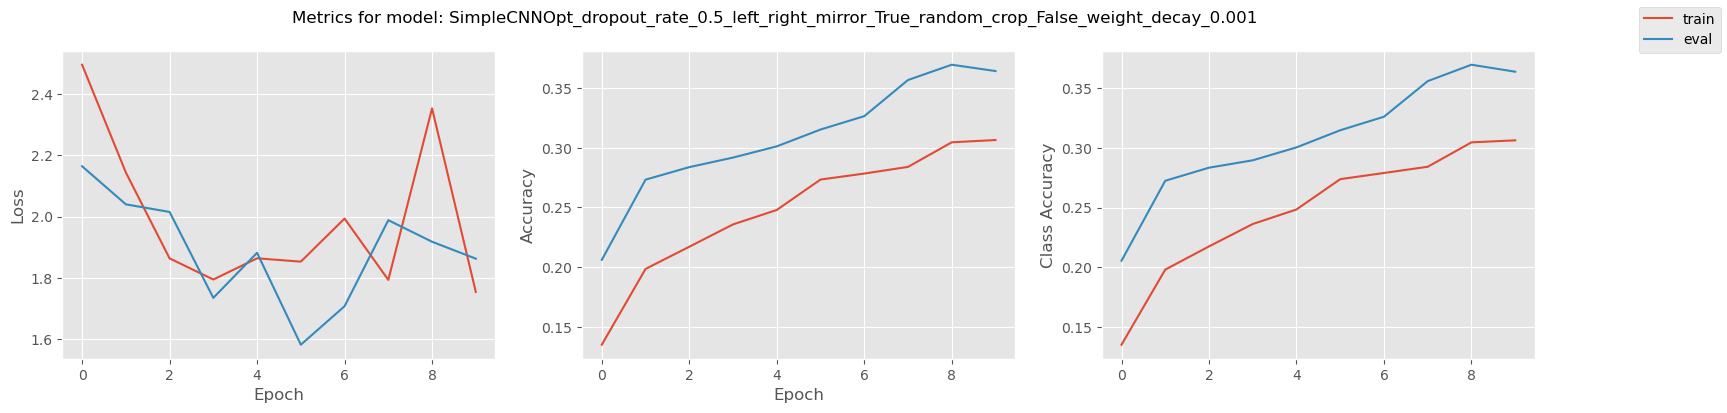

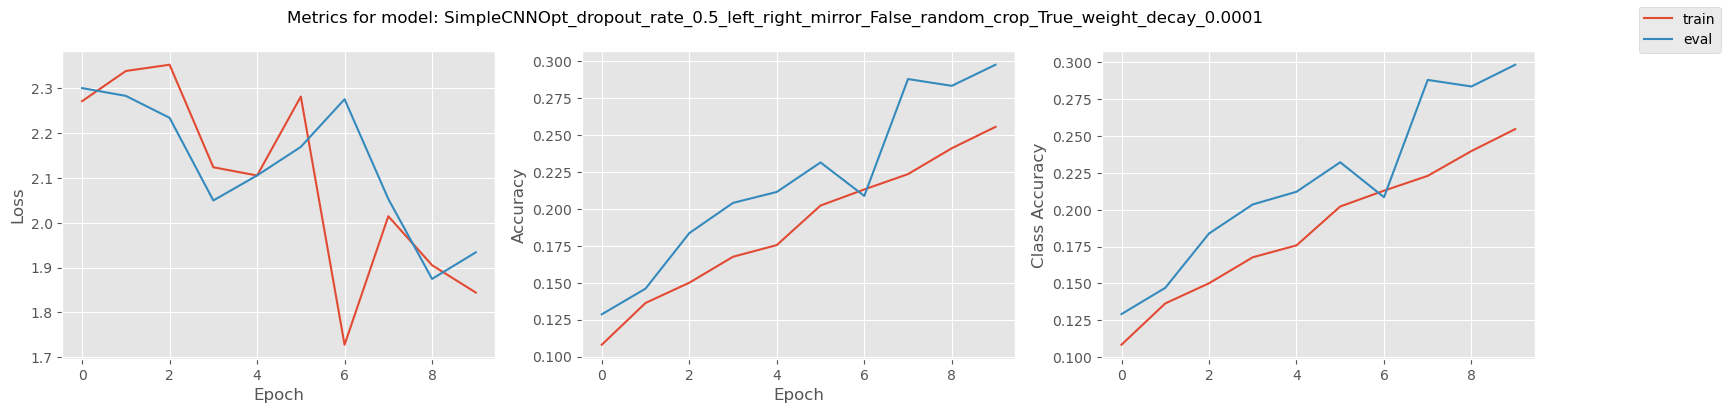

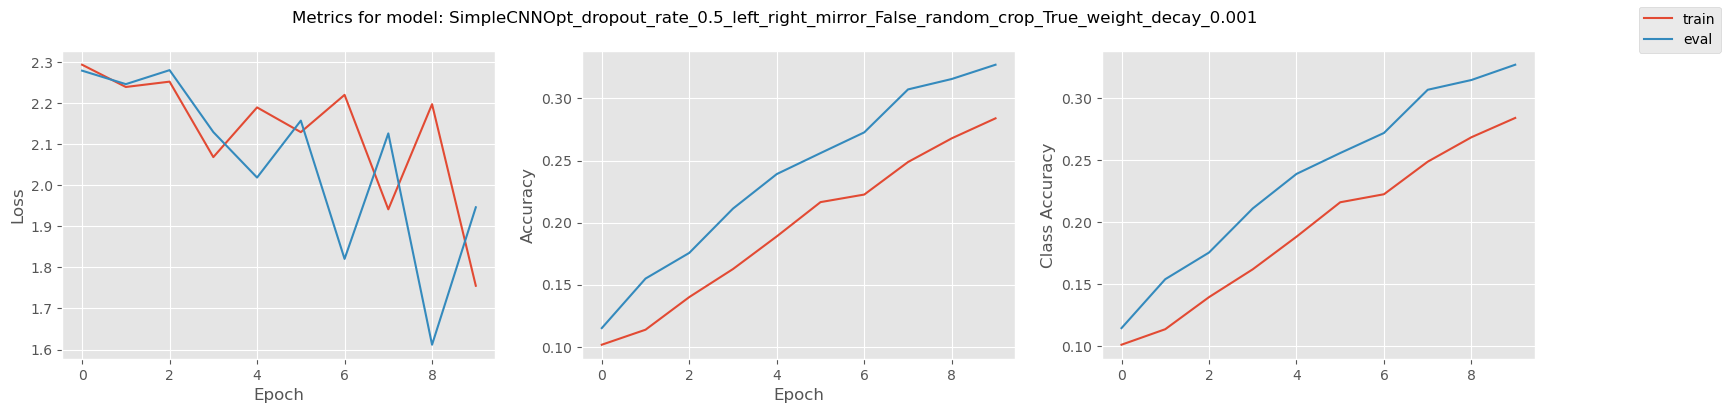

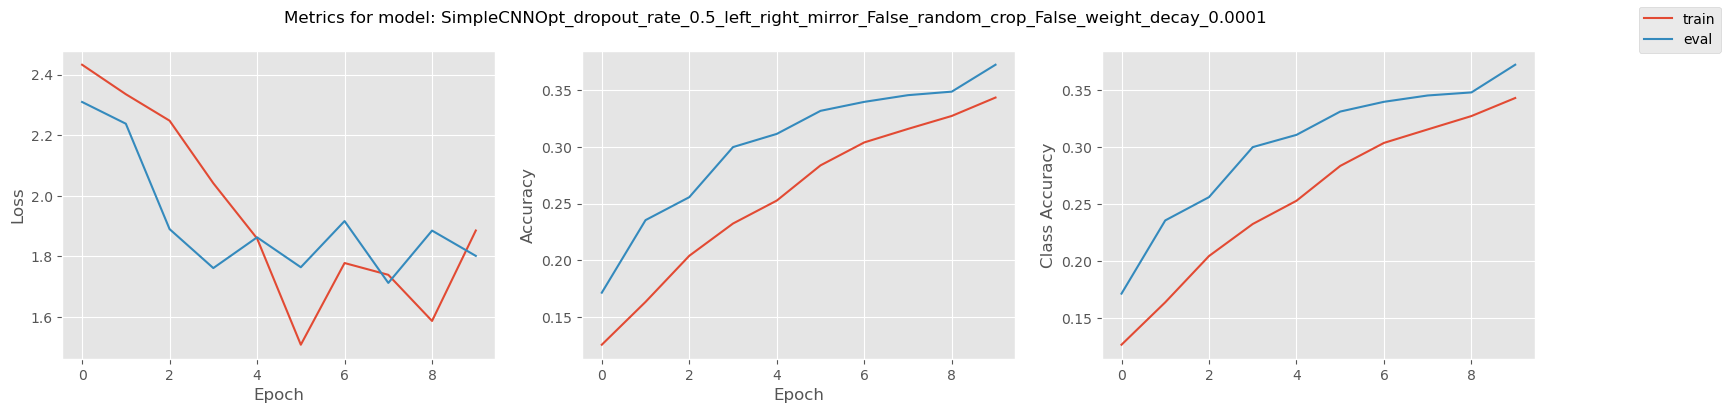

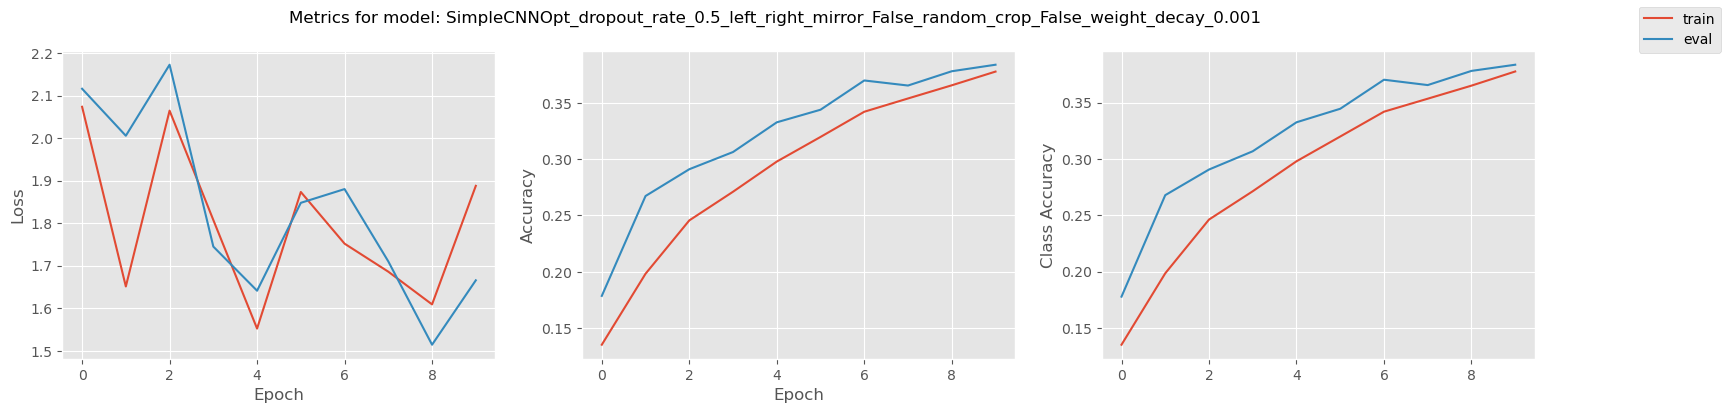

In [4]:
# Perform grid search for hyperparameter optimization

param_grid = {
    'random_crop': [True, False],
    'left_right_mirror': [True, False],
    'dropout_rate': [0.25, 0.5],
    'weight_decay': [0.0001, 0.001]
}

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None

for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = SimpleCNNOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)

    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)



1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  DeepCNNOpt

TRAIN, EPOCH: 0 
Loss: 1.825013518333435
Accuracy: 0.19
Class Accuracy: 0.18939973711967467

VALIDATION, EPOCH: 0 
Loss: 2.0795958042144775
Accuracy: 0.3261
Class Accuracy: 0.3268536224961281
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.7970490455627441
Accuracy: 0.324
Class Accuracy: 0.323988476395607

VALIDATION, EPOCH: 1 
Loss: 2.0380592346191406
Accuracy: 0.3566
Class Accuracy: 0.3570574760437012
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.8201453685760498
Accuracy: 0.3639
Class Accuracy: 0.3645384684205055

VALIDATION, EPOCH: 2 
Loss: 1.612975835800171
Accuracy: 0.4124
Class Accuracy: 0.4114430695772171
Best mean per class accuracy on validation data set is higher. Saving new best mod

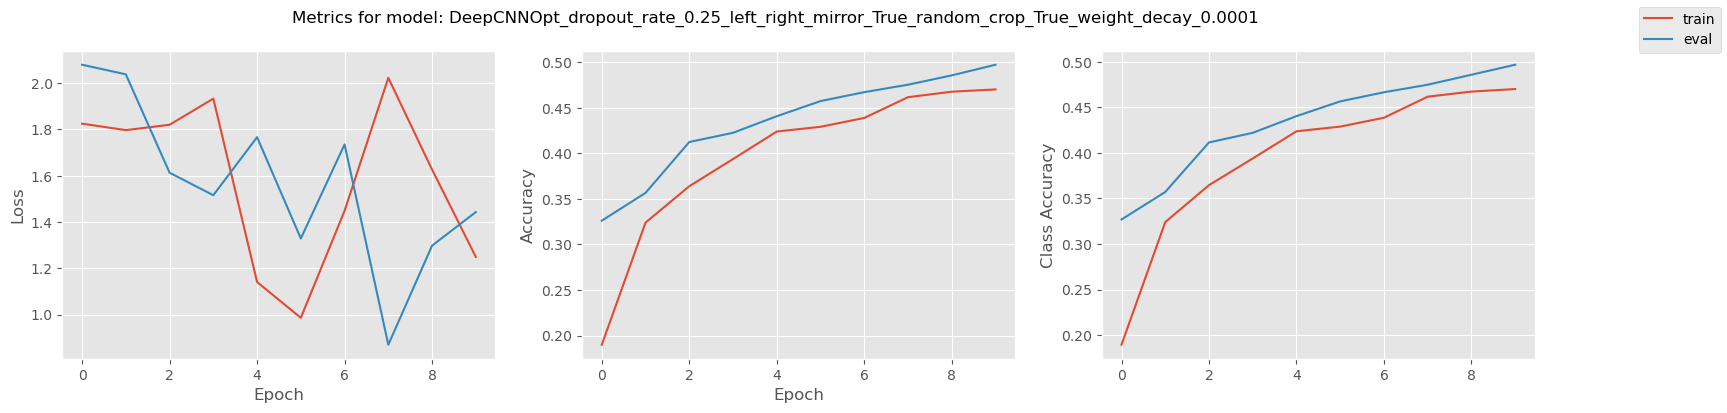

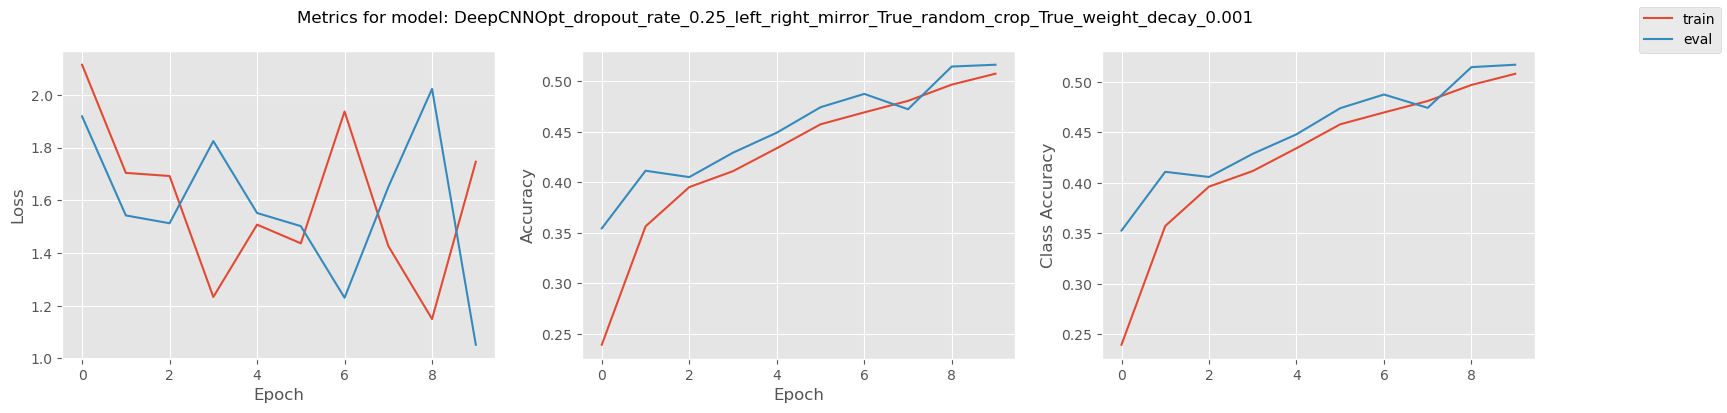

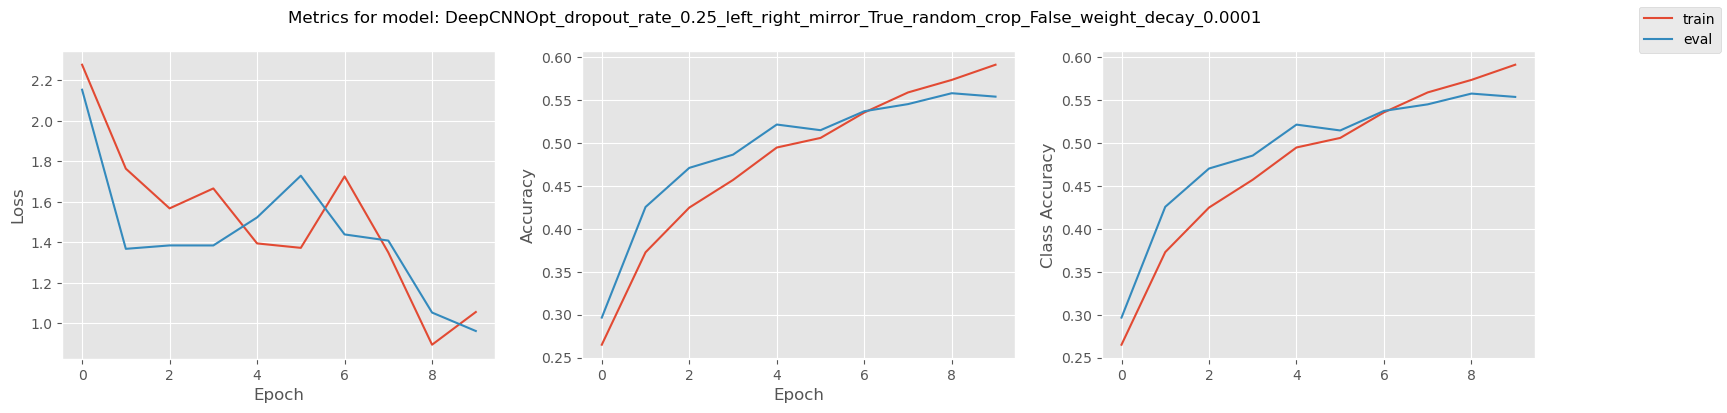

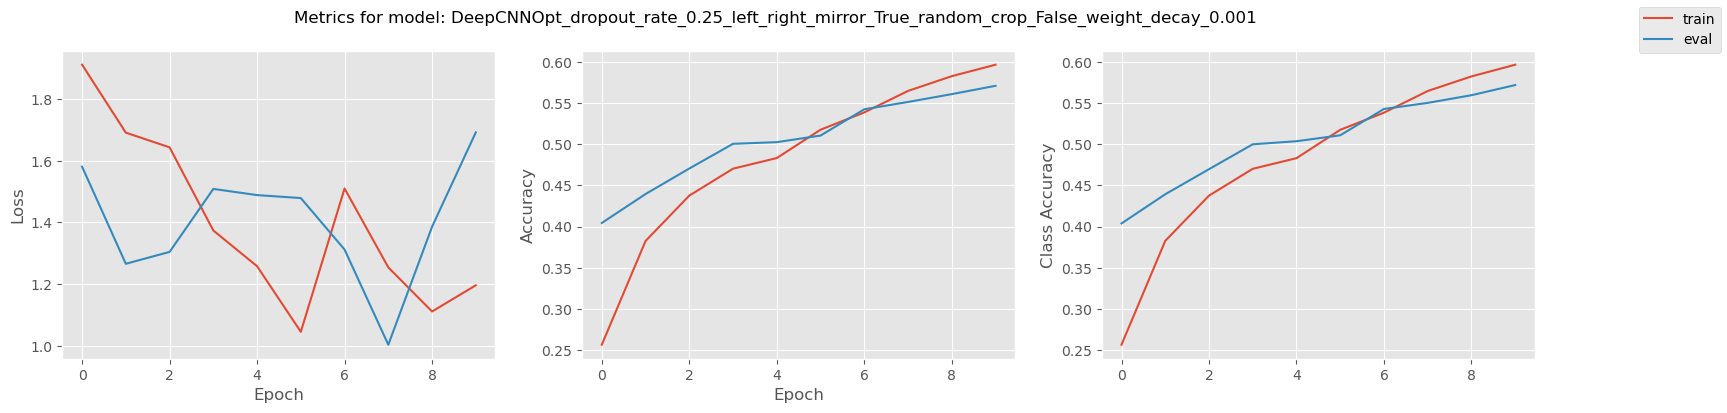

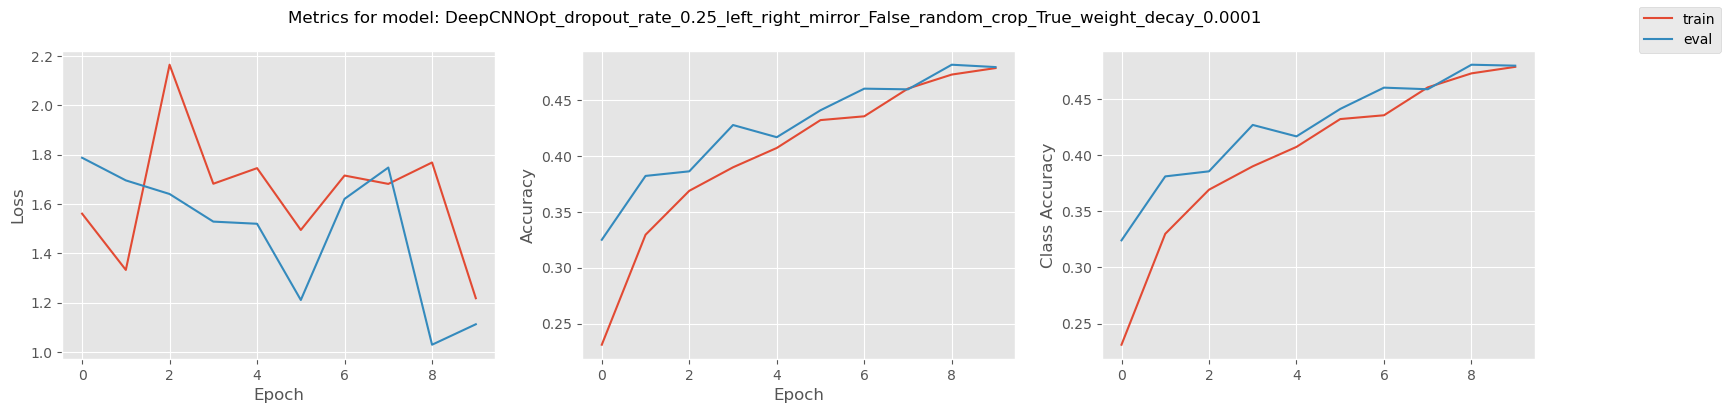

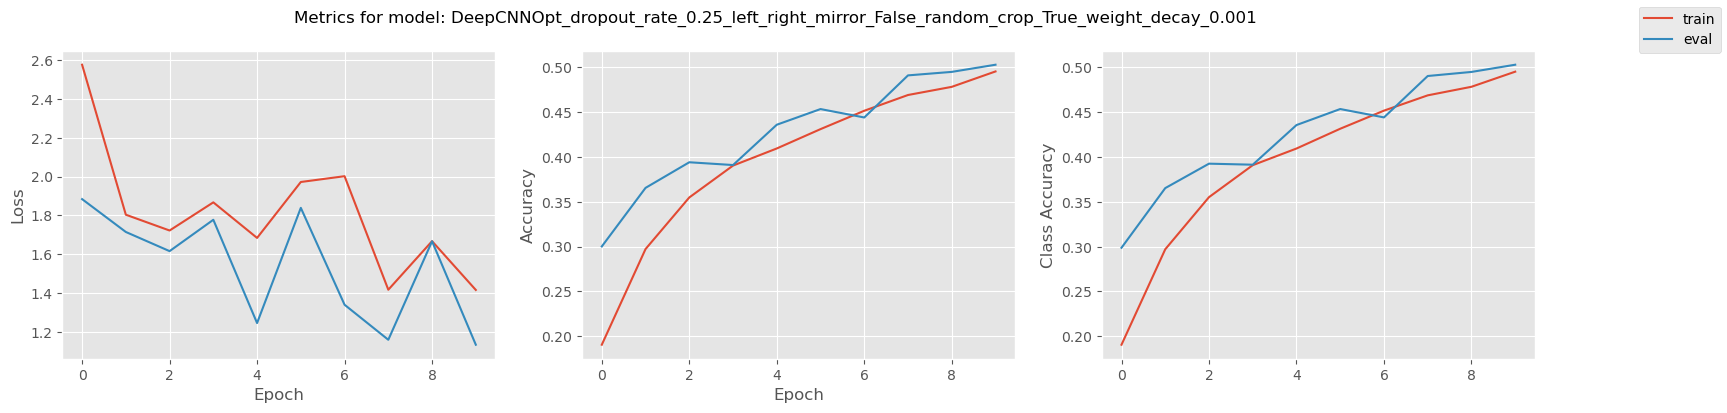

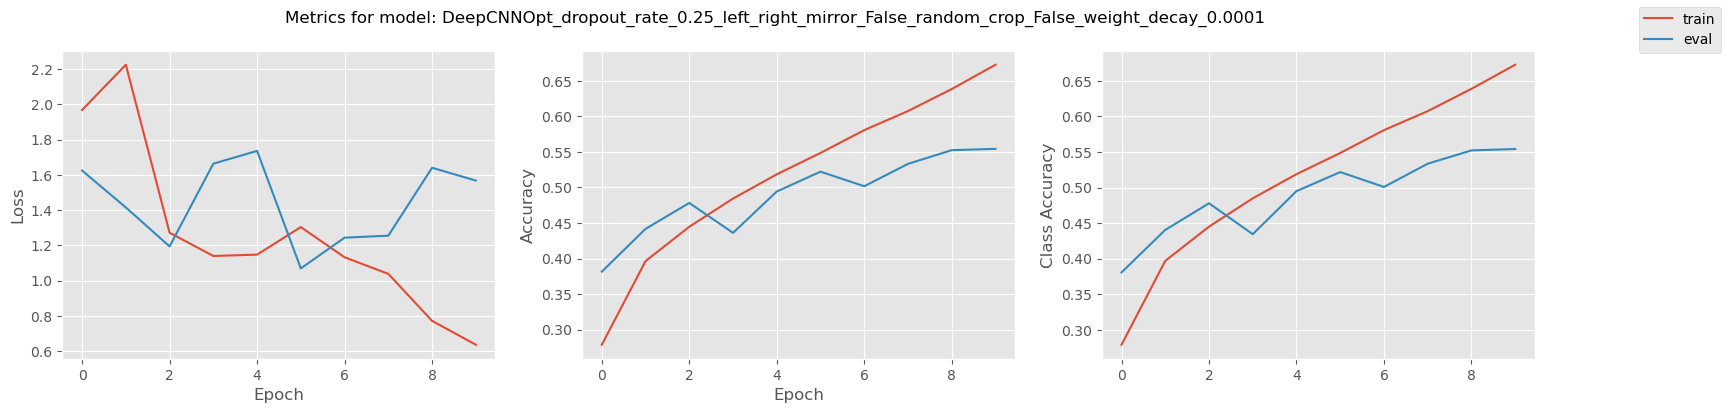

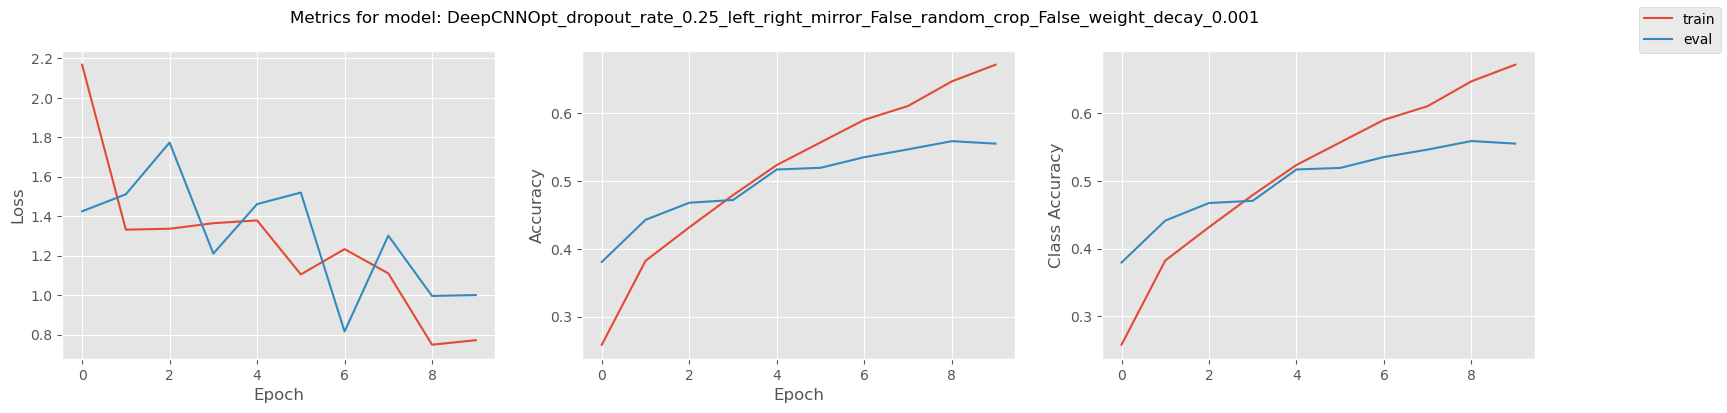

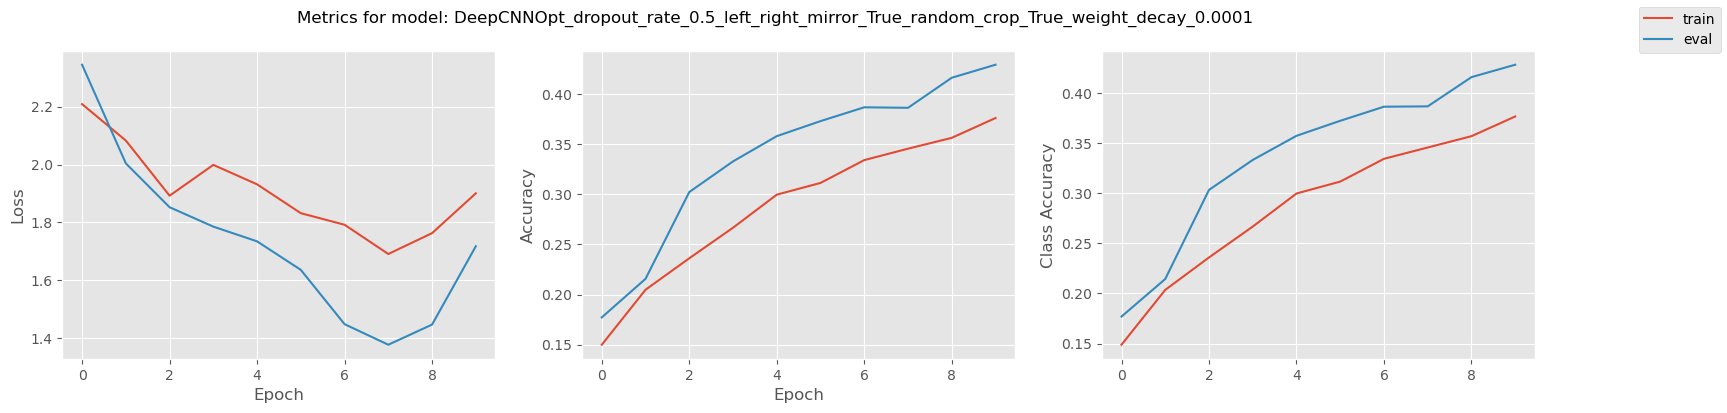

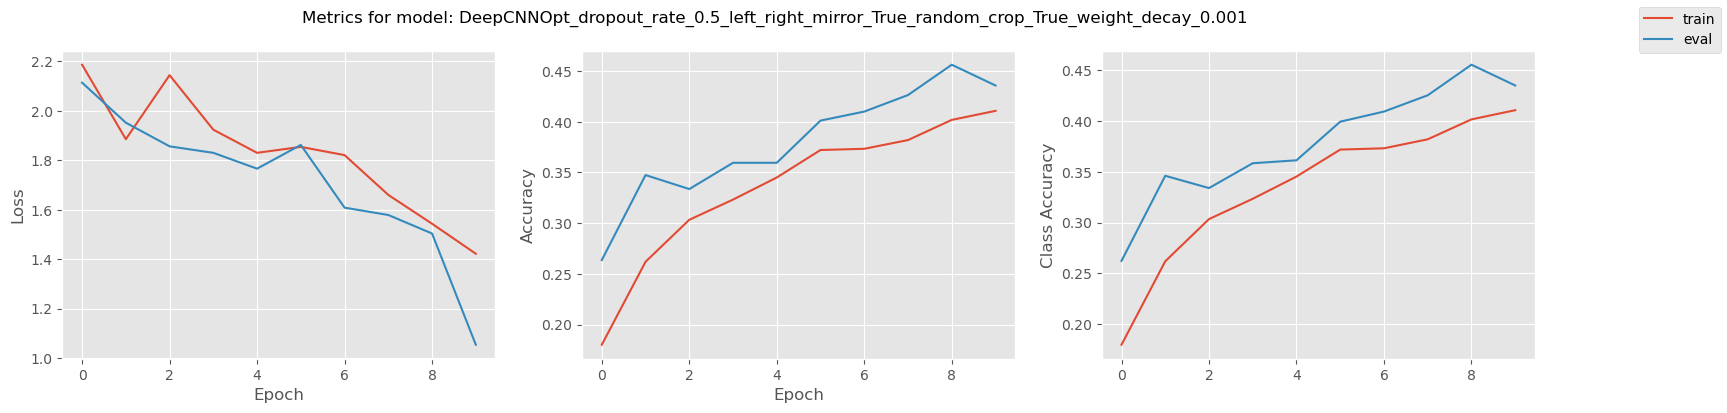

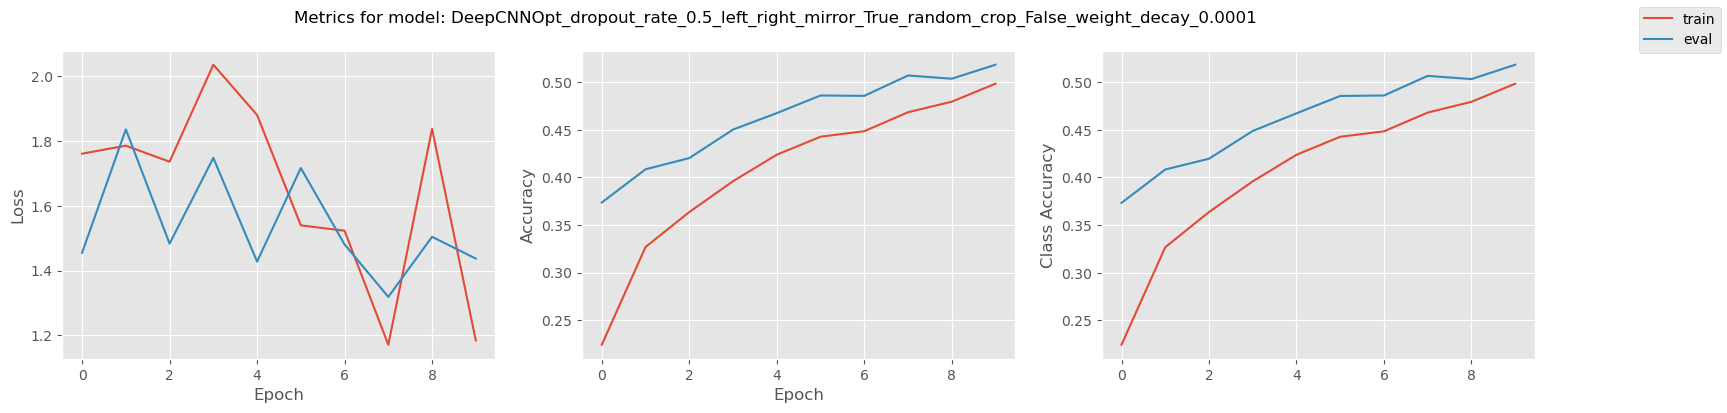

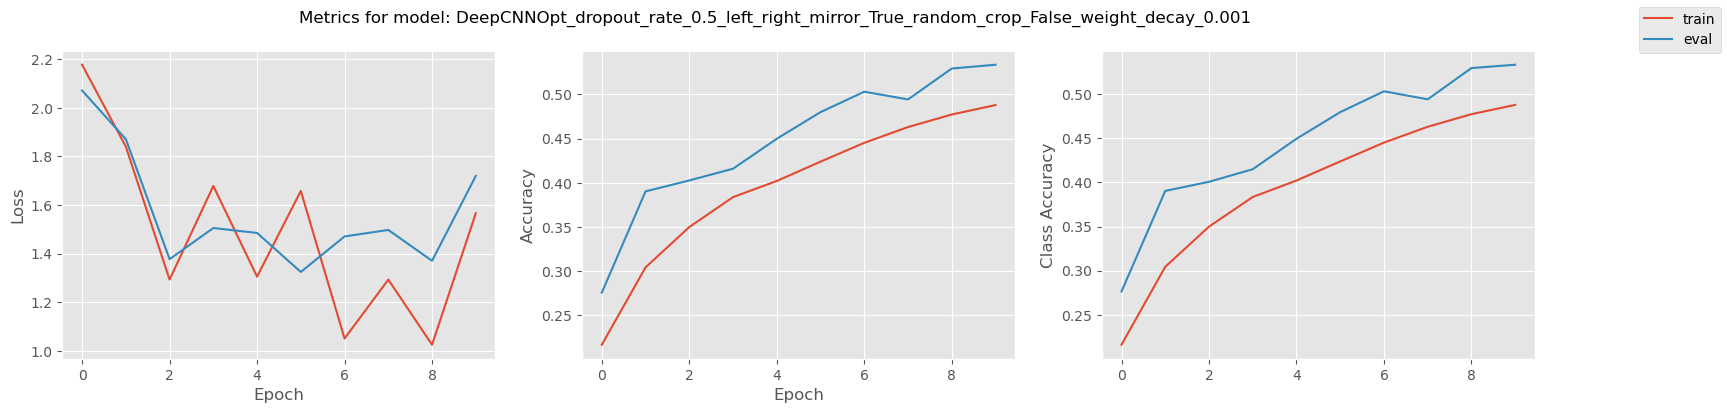

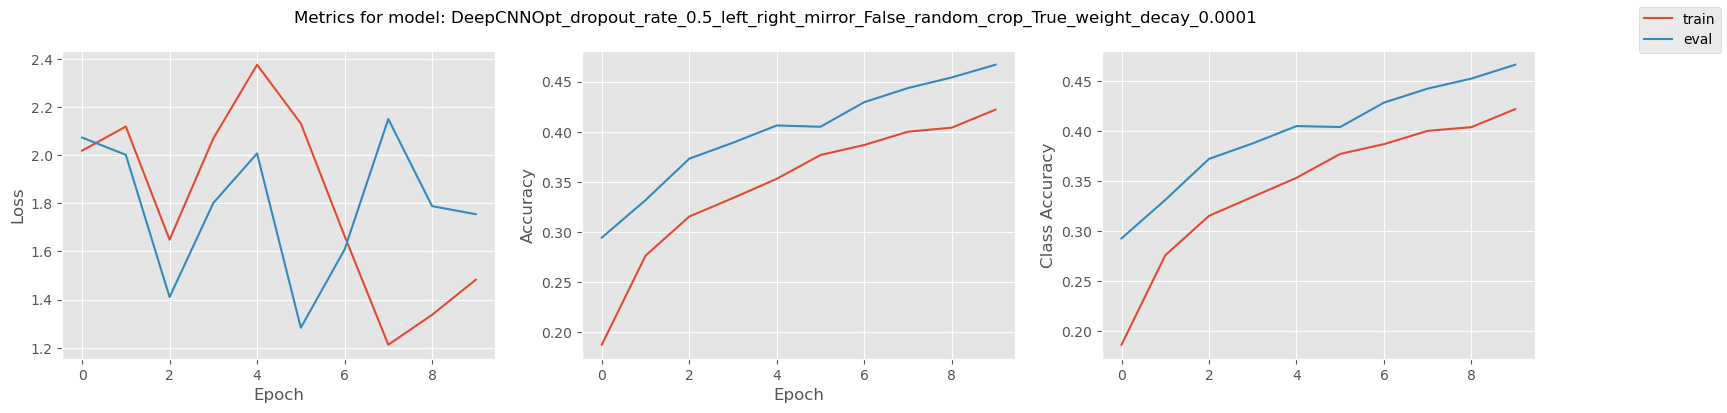

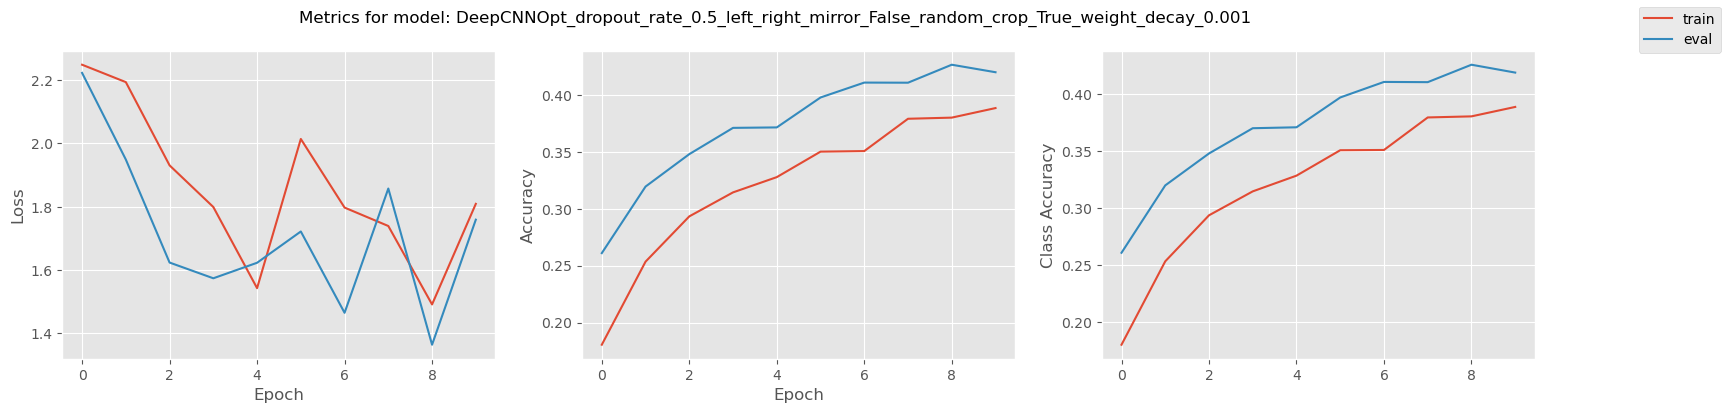

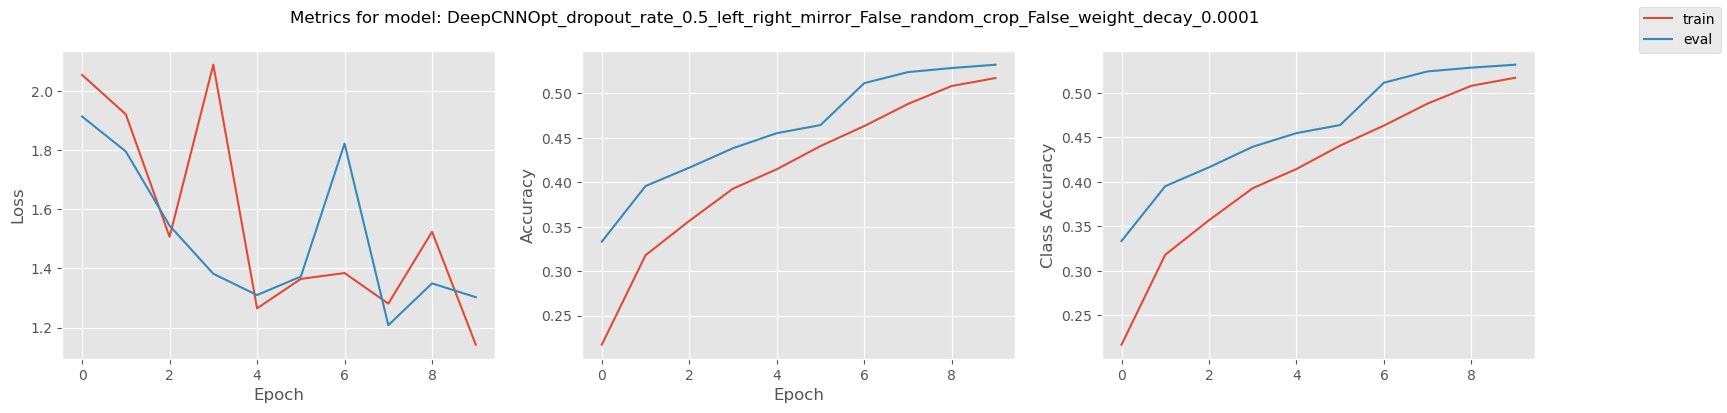

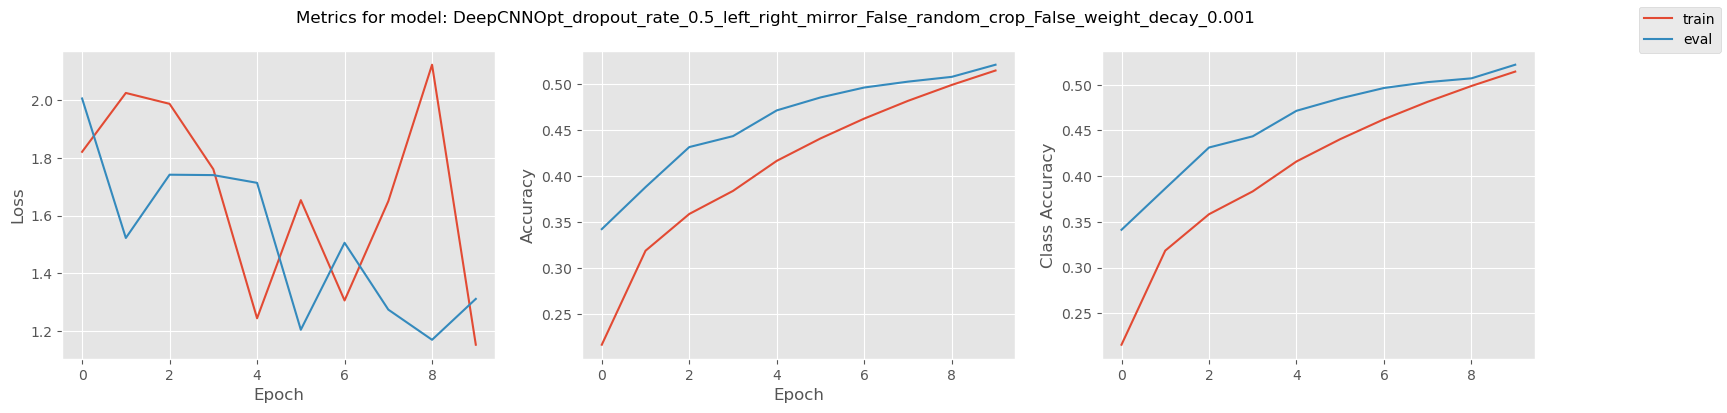

In [5]:
# Perform grid search for hyperparameter optimization

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None


for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = DeepCNNOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)

    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)




1/16 Training model with hyperparameters: {'dropout_rate': 0.25, 'left_right_mirror': True, 'random_crop': True, 'weight_decay': 0.0001}

Training model:  DeepNormalizedCNNOpt

TRAIN, EPOCH: 0 
Loss: 1.9197849035263062
Accuracy: 0.3242
Class Accuracy: 0.3239979177713394

VALIDATION, EPOCH: 0 
Loss: 1.930237889289856
Accuracy: 0.3456
Class Accuracy: 0.3459615662693977
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 1 
Loss: 1.3480321168899536
Accuracy: 0.4211
Class Accuracy: 0.4212843686342239

VALIDATION, EPOCH: 1 
Loss: 2.0550124645233154
Accuracy: 0.3965
Class Accuracy: 0.39603241086006163
Best mean per class accuracy on validation data set is higher. Saving new best model

TRAIN, EPOCH: 2 
Loss: 1.6631748676300049
Accuracy: 0.4675
Class Accuracy: 0.46768094301223756

VALIDATION, EPOCH: 2 
Loss: 1.584237813949585
Accuracy: 0.3837
Class Accuracy: 0.383840954862535
Best mean per class accuracy on validation data set is higher. Savin

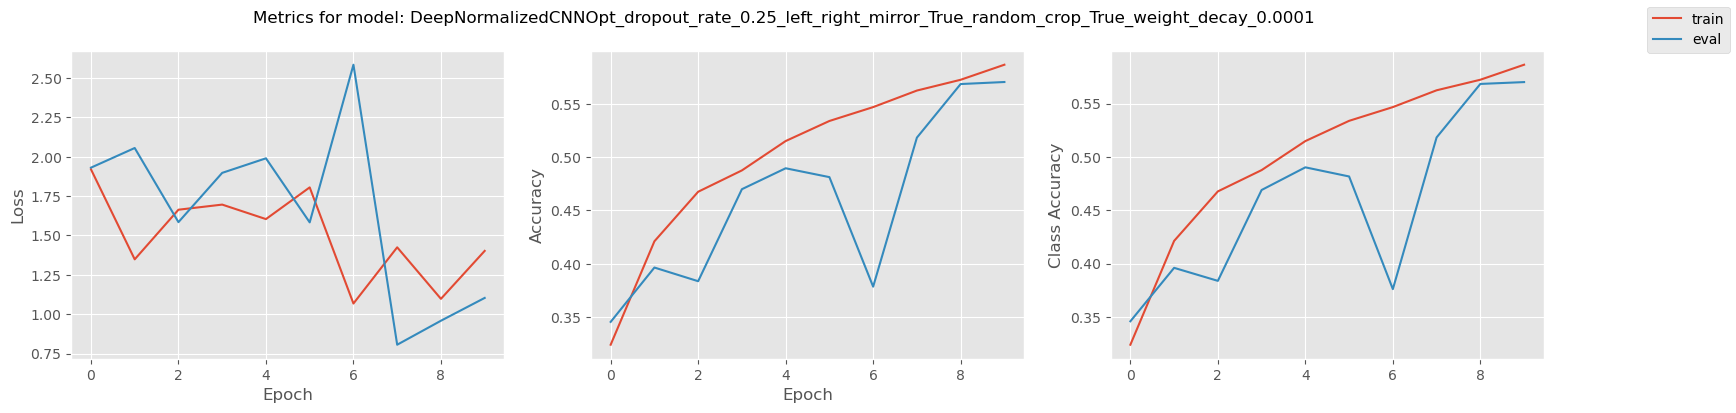

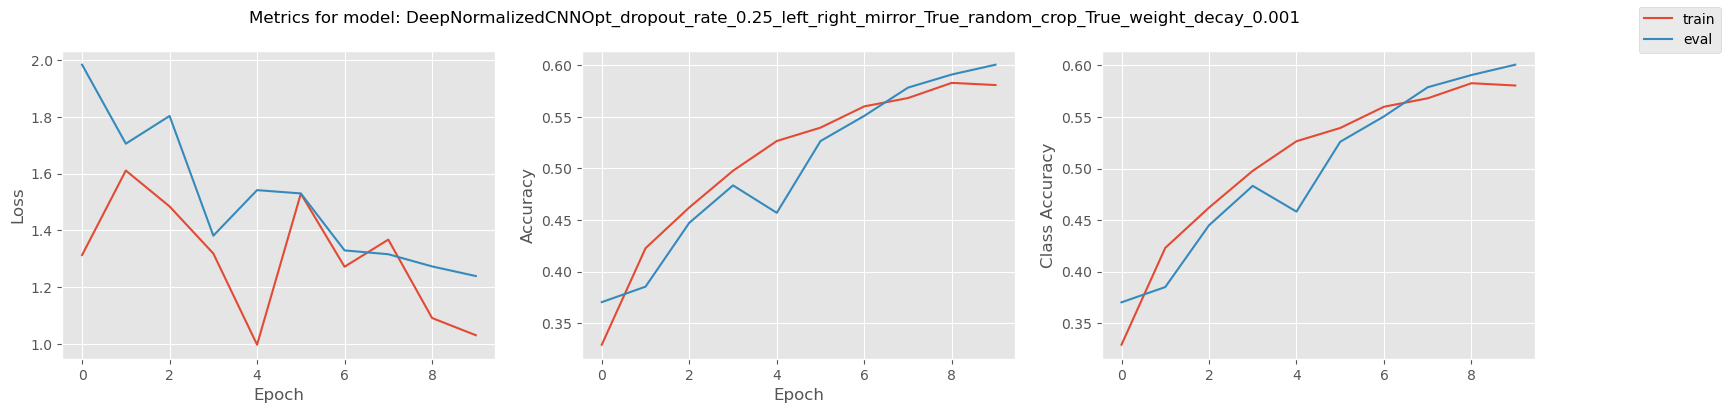

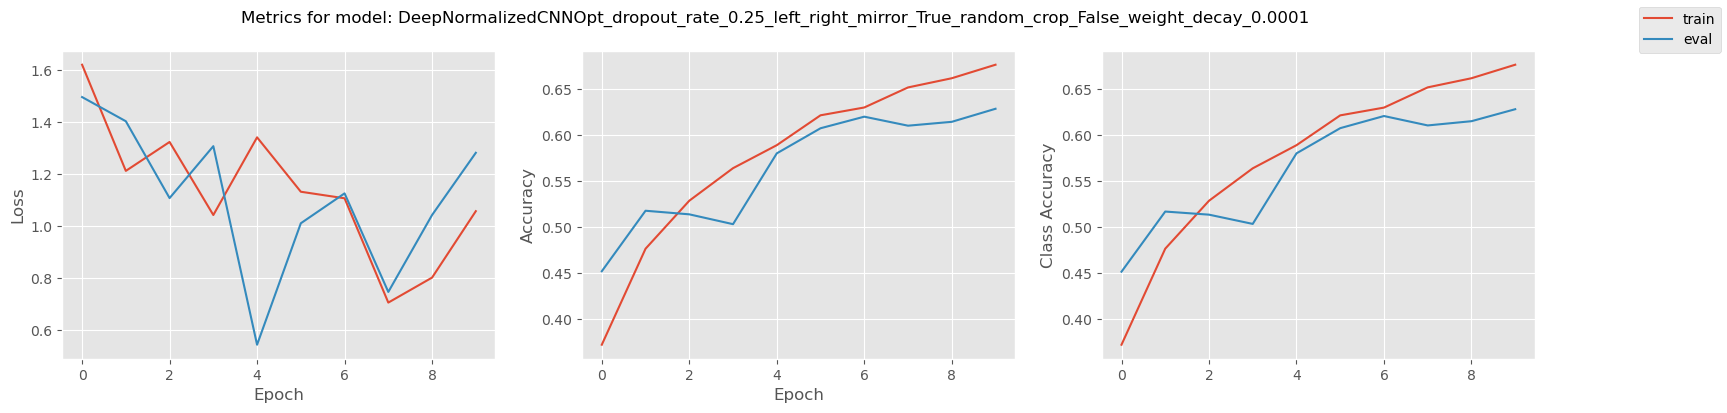

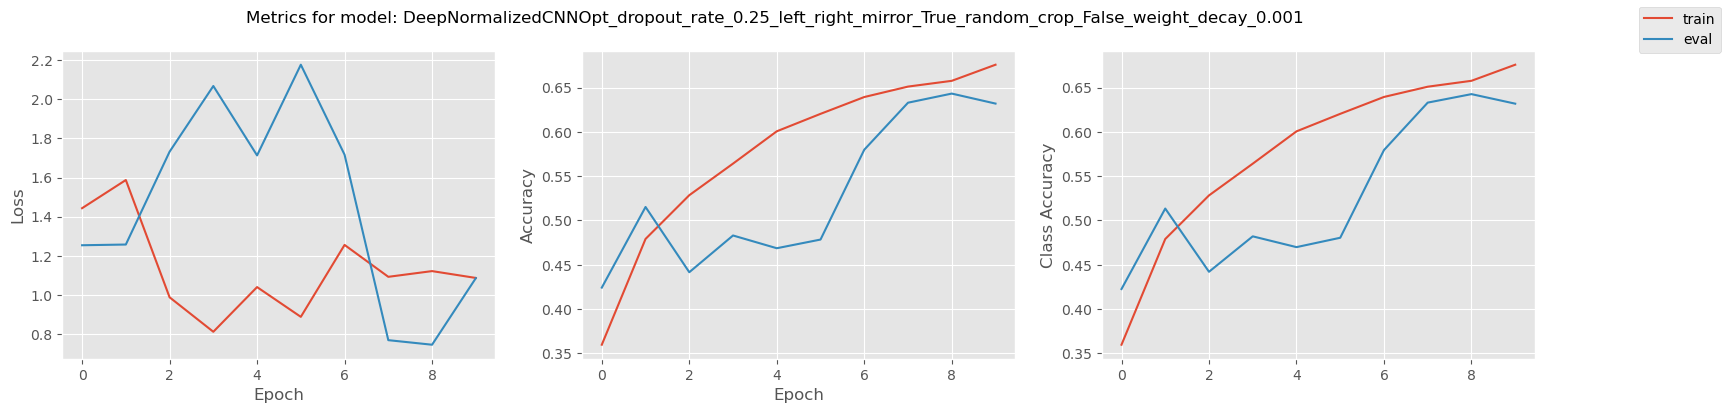

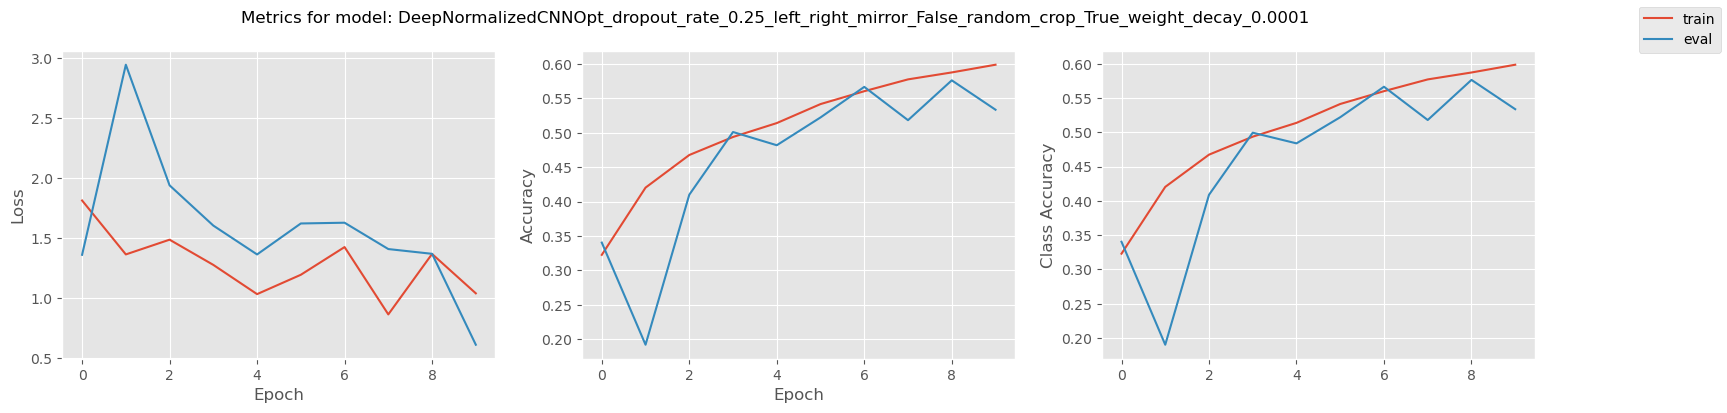

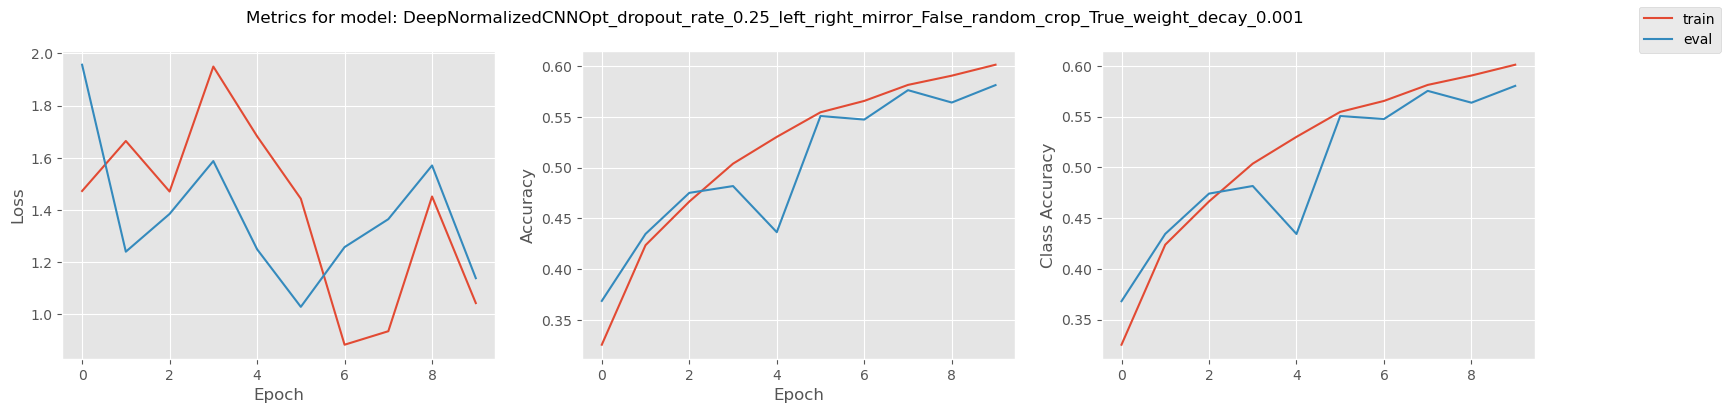

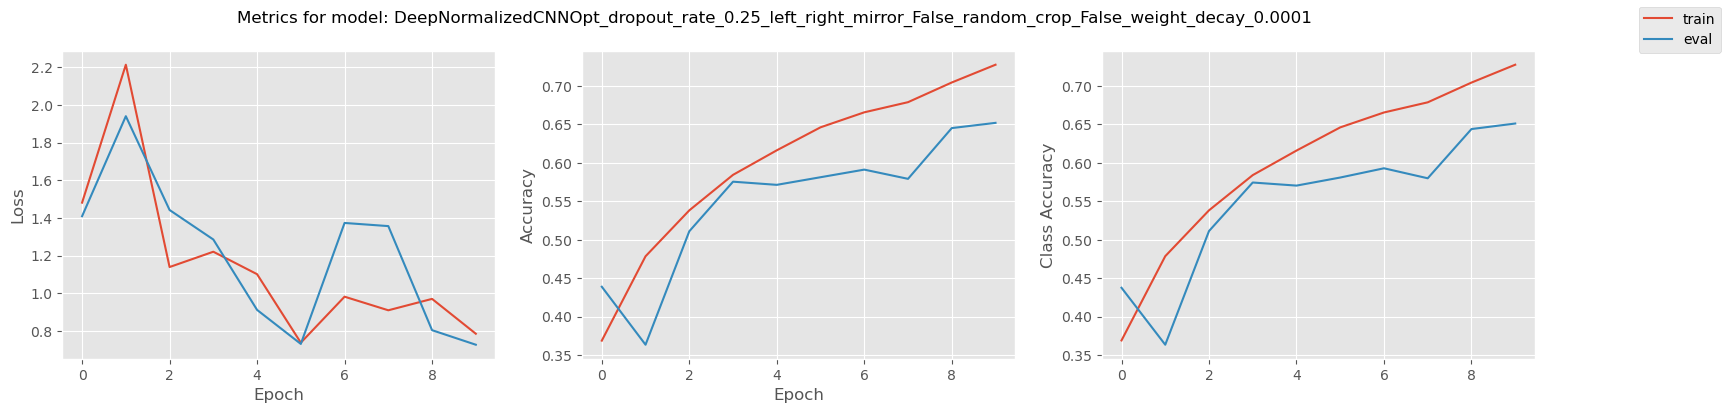

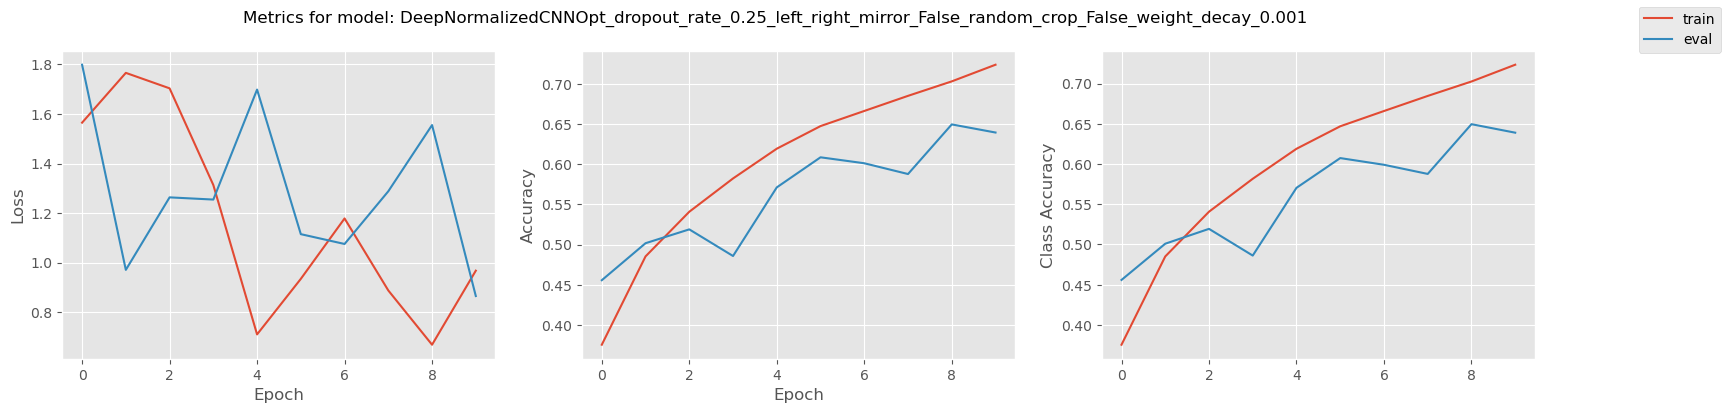

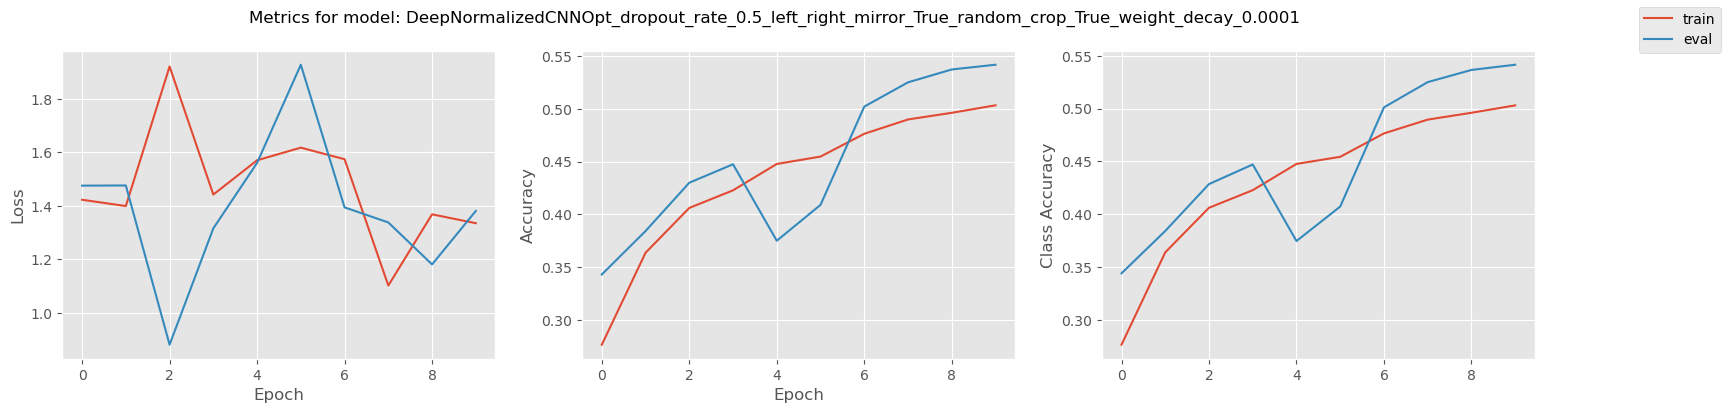

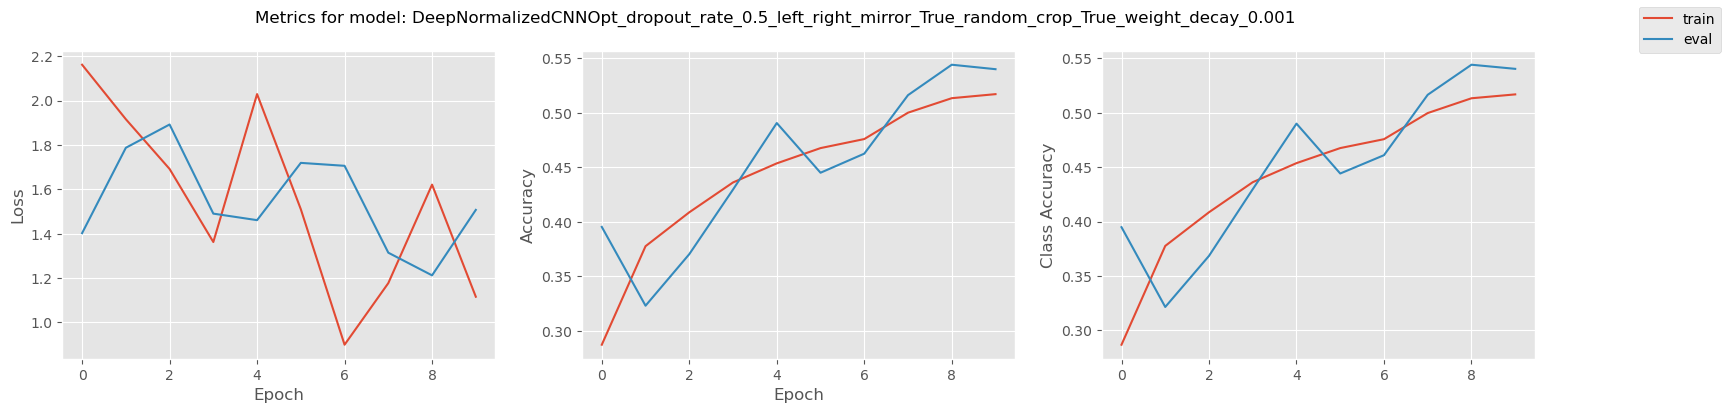

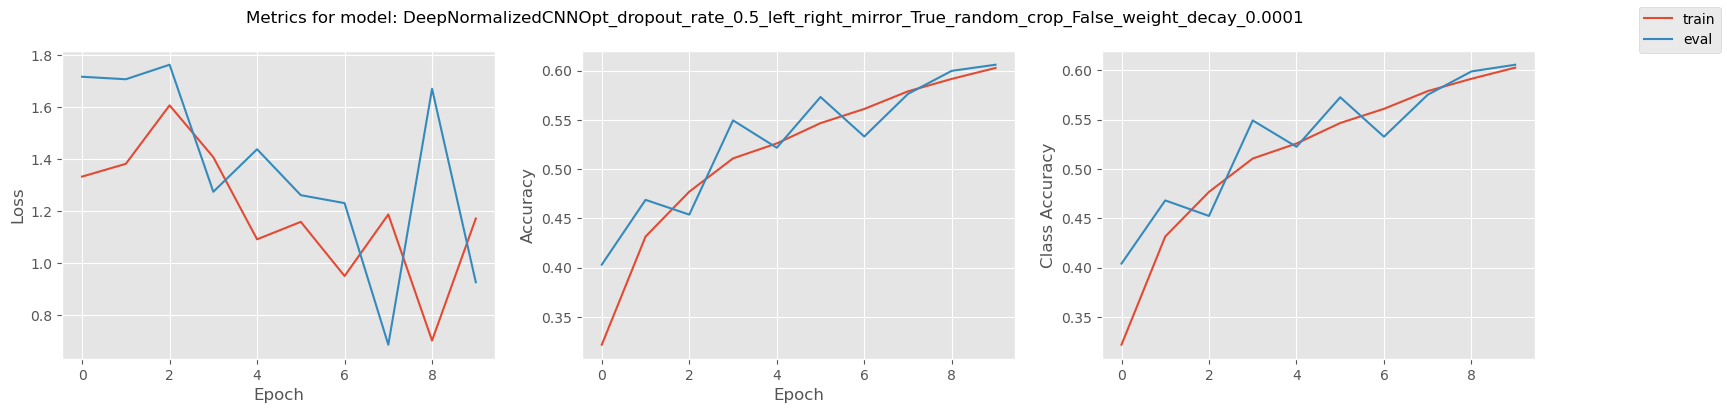

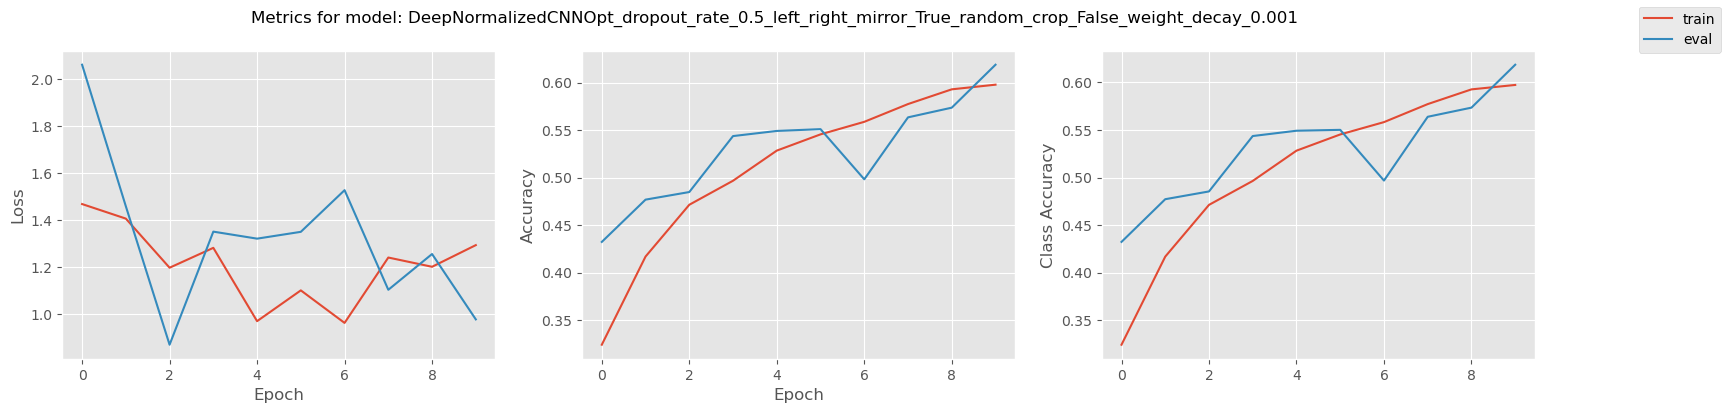

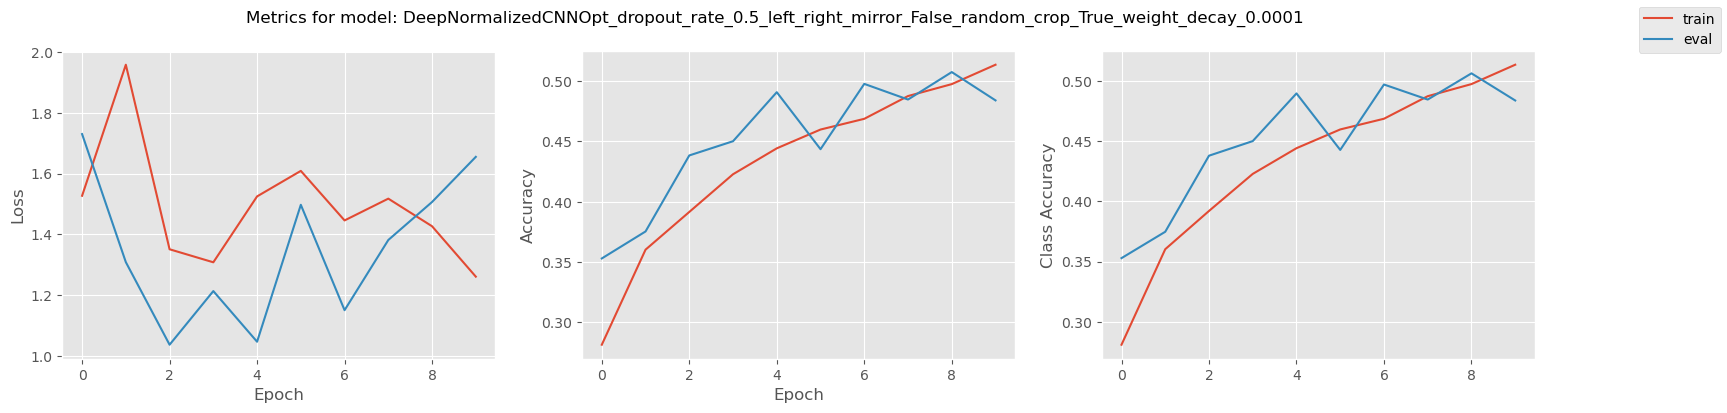

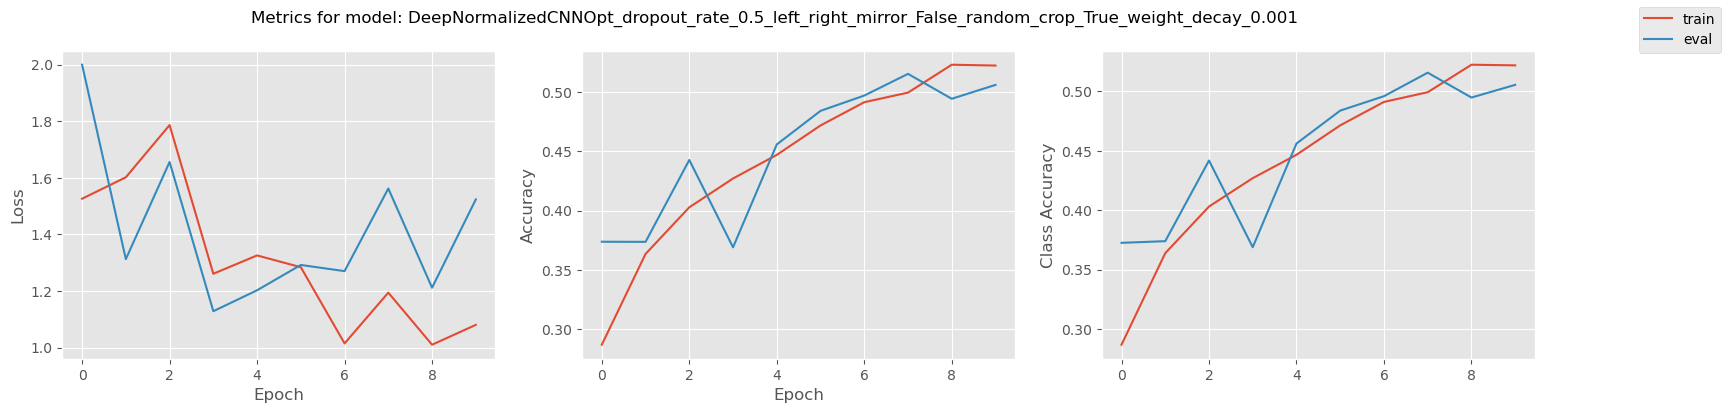

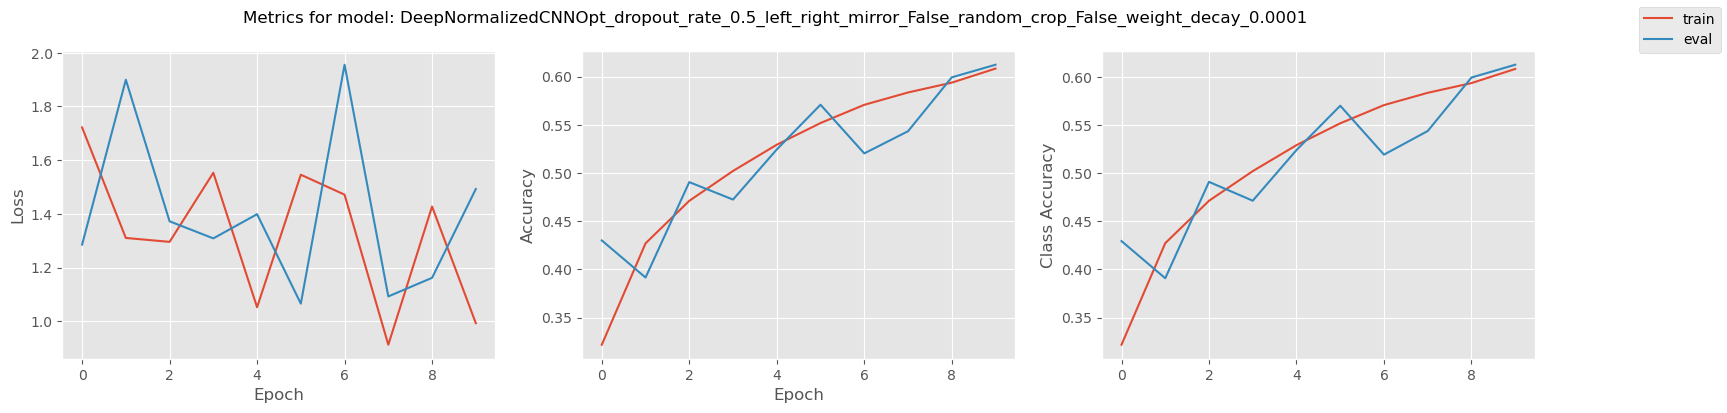

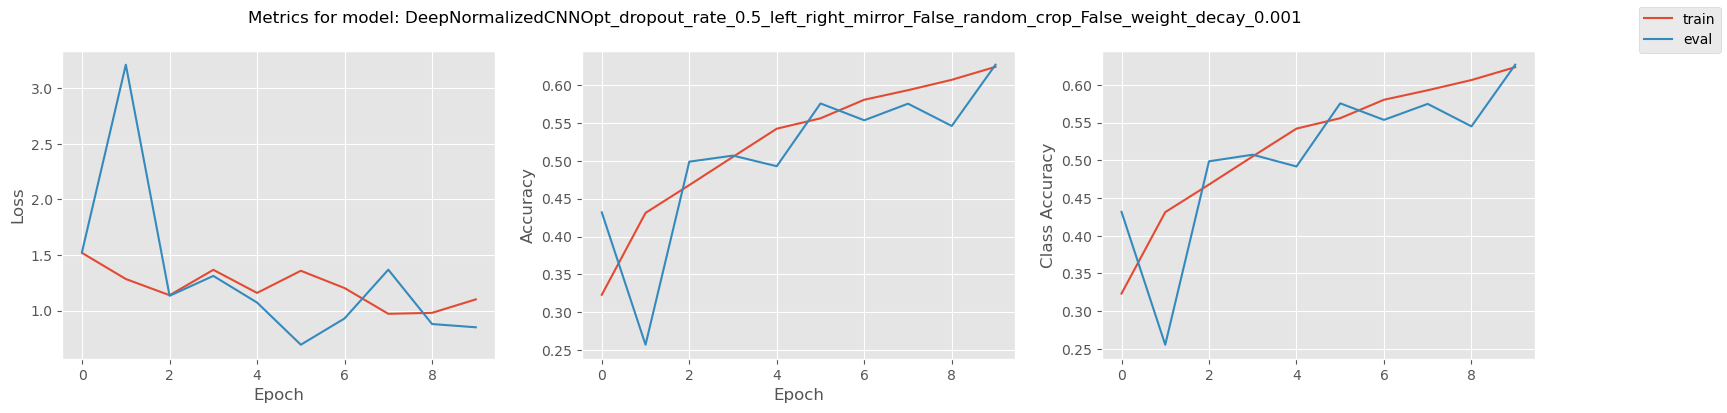

In [6]:
# Perform grid search for hyperparameter optimization

best_model_name = None
best_model = None
best_model_accuracy = 0.0
best_parameters = None

for i, params in enumerate(ParameterGrid(param_grid)):
        
    if params['random_crop'] == True and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == True and params['left_right_mirror'] == False:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomCrop(32, padding=4),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    elif params['random_crop'] == False and params['left_right_mirror'] == True:
        transform = v2.Compose([
            v2.ToImage(), 
            v2.RandomHorizontalFlip(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])
    else:
        transform = v2.Compose([
            v2.ToImage(),
            v2.ToDtype(torch.float32, scale=True),
            v2.Normalize(mean = [0.485, 0.456,0.406], std = [0.229, 0.224, 0.225])
        ])

    train_data_opt, val_data_opt, test_data_opt = cifar_load(transform)

    model = DeepNormalizedCNNOpt(dropout_rate=params['dropout_rate'])

    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=params['weight_decay'])

    print(f'\n\n{i+1}/{len(ParameterGrid(param_grid))} Training model with hyperparameters: {params}')

    name = model.__class__.__name__

    for param in params:
        name += "_"+param + "_" + str(params[param])

    trainer = train_model_opt(model, optimizer, name, train_data_opt, val_data_opt)

    trainer.train()

    save_metrics(trainer, model.__class__.__name__, params)

    model, test_metric = test_model(model, params, test_data_opt)

    plot_metrics(trainer, name)

    if test_metric.accuracy() > best_model_accuracy:
        best_model_accuracy = test_metric.accuracy()
        best_parameters = params
        best_model = model
        best_model_name = name

print("Model:", best_model_name)
print("Best model found with parameters:", best_parameters)
print("Best test accuracy:", best_model_accuracy)
